<a href="https://colab.research.google.com/github/f1li/FDA/blob/main/AutomaticCoachReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/WyScout


,,,,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

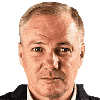

Button(description='Alvini M.', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

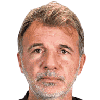

Button(description='Baroni M.', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

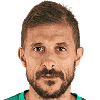

Button(description='Dionisi A.', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

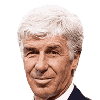

Button(description='Gasperini G.', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

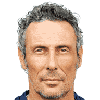

Button(description='Gotti L.', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

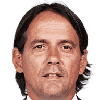

Button(description='Inzaghi S.', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

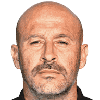

Button(description='Italiano V.', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

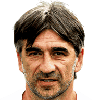

Button(description='Juric I.', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

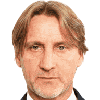

Button(description='Nicola D.', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

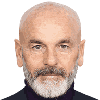

Button(description='Pioli S.', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

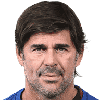

Button(description='Sottil A.', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

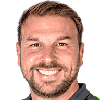

Button(description='Zanetti P.', style=ButtonStyle())

<IPython.core.display.Javascript object>


Selezionare il Mister da analizzare:



Output()

In [ ]:
#@title Selezione Analisi
!pip install highlight_text --quiet
!pip install matplotlib --upgrade --quiet

import pandas as pd
import numpy as np
import requests
from requests.auth import HTTPBasicAuth

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from matplotlib import rcParams

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import ipywidgets
from ipywidgets import widgets
from IPython.display import clear_output

from PIL import Image
import urllib

import plotly.graph_objects as go
from highlight_text import fig_text
from google.colab import widgets

import os
import json

# Replace below values with your own
username = 'qjpuw3t-yf3bvhgms-8d0gift-bm2fprvs4z'
token =  '7*.w$Ivko$FpRsbumn0gF(0Kc5yMAI'
base_url = 'https://apirest.wyscout.com/v3{}'


Lega ={
    'Serie A' : 524,
    'Serie B' : 527
}

Stagione21_22 = {
    'Serie A' : (Lega['Serie A'], 187528),
    'Serie B' : (Lega['Serie B'], 187575)
}

Stagione20_21 = {
    'Serie A' : (Lega['Serie A'], 186353),
    'Serie B' : (Lega['Serie B'], 186386)
}

teams_2122_A = {3157: 'Milan', 3158: 'Roma', 3159: 'Juventus',  3161: 'Internazionale',  3162: 'Lazio',  3163: 'Udinese',  3164: 'Sampdoria',  3166: 'Bologna',  3172: 'Atalanta', 3173: 'Cagliari', 
                3176: 'Fiorentina', 3178: 'Empoli', 3185: 'Torino', 3187: 'Napoli', 3191: 'Venezia', 3192: 'Salernitana', 3193: 'Genoa', 3194: 'Hellas Verona', 3205: 'Spezia', 3315: 'Sassuolo'}

teams_2122_B = {3160: 'Parma', 3167: 'Brescia', 3168: 'Lecce', 3170: 'Reggina', 3179: 'Perugia', 3182: 'Ternana', 3186: 'Vicenza', 3188: 'Ascoli', 3197: 'Crotone', 3200: 'Como', 3204: 'Spal',
                3207: 'Pisa', 3208: 'Cittadella', 3219: 'Benevento', 3235: 'Cremonese', 3236: 'Monza', 3244: 'Alessandria', 3254: 'Frosinone', 3311: 'Cosenza', 3426: 'Pordenone'}

teams_2021_A = {3157: 'Milan', 3158: 'Roma', 3159: 'Juventus', 3160: 'Parma', 3161: 'Internazionale', 3162: 'Lazio', 3163: 'Udinese', 3164: 'Sampdoria', 3166: 'Bologna', 3172: 'Atalanta', 3173: 'Cagliari',
                3176: 'Fiorentina', 3185: 'Torino', 3187: 'Napoli', 3193: 'Genoa', 3194: 'Hellas Verona', 3197: 'Crotone', 3205: 'Spezia', 3219: 'Benevento', 3315: 'Sassuolo'}

teams_2021_B = {3165: 'Chievo', 3167: 'Brescia', 3168: 'Lecce', 3170: 'Reggina', 3178: 'Empoli', 3186: 'Vicenza', 3188: 'Ascoli', 3191: 'Venezia', 3192: 'Salernitana', 3199: 'Pescara', 3204: 'Spal',
                3207: 'Pisa', 3208: 'Cittadella', 3211: 'Reggiana', 3235: 'Cremonese', 3236: 'Monza', 3254: 'Frosinone', 3311: 'Cosenza', 3404: 'Virtus Entella', 3426: 'Pordenone'}

teams = ['Fiorentina', 'Milan', 'Atalanta', 'Bologna', 'Cremonese', 'Empoli', 'Hellas Verona', 'Internazionale', 'Juventus',
         'Lazio', 'Lecce', 'Monza', 'Roma', 'Napoli', 'Salernitana', 'Sampdoria', 'Sassuolo', 'Spezia', 'Torino', 'Udinese',
         'Genoa', 'Cagliari', 'Venezia', 'Benevento', 'Crotone', 'Parma', 'Brescia', 'Spal',
         'Alessandria', 'Ascoli', 'Cittadella', 'Como', 'Cosenza', 'Frosinone',
         'Vicenza', 'Perugia', 'Pisa', 'Pordenone', 'Reggina', 'Ternana', 'Pescara', 'Reggiana', 'Virtus Entella',
         'Chievo', 'Juve Stabia', 'Livorno', 'Trapani']
footId = [8535, 8564, 8524, 9857, 7801, 8534, 9876, 8636, 9885, 8543, 9888, 6504, 8686, 9875,
          6480, 9882, 7943, 9881, 9804, 8600, 10233, 8529, 7881, 6266, 9884, 10167, 9858, 8547,
          6503, 8522, 6485, 10171, 6456, 9891, 145007, 8685, 6479, 465613, 8690, 6457, 9878, 959006, 208932,
          8533, 6106, 8537, 208936]

Tecnico = ['Baroni M.', 'Dionisi A.', 'Sottil A.', 'Alvini M.', 'Gasperini G.', 'Gotti L.', 'Juric I.', 'Inzaghi S.', 'Italiano V.', 'Nicola D.', 'Pioli S.', 'P. Zanetti']
Lega21_22_id = [527, 524, 527, 527, 524, 524, 524, 524, 524, 524, 524, 524]
Stagione21_22_id = [187575, 187528, 187575, 187575, 187528, 187528, 187528, 187528, 187528, 187528, 187528, 187528]
Team21_22_id = [3168, 3315, 3188, 3179, 3172, 3163, 3185, 3161, 3176, 3192, 3157, 3191]

Lega20_21_id = [527, 527, 527, 527, 524, 524, 524, 524, 524, 524, 524, 527]
Stagione20_21_id = [186386, 186386, 186386, 186386, 186353, 186353, 186353, 186353, 186353, 186353, 186353, 186386]
Team20_21_id = [3170, 3178, 3188, 3211, 3172, 3163, 3194, 3162, 3205, 3185, 3157, 3191]

Tecnico_df = pd.DataFrame({'Tecnico':Tecnico, 'Lega2122': Lega21_22_id, 'Stagione2122':Stagione21_22_id, 'Team2122':Team21_22_id,
                           'Lega2021': Lega20_21_id, 'Stagione2021':Stagione20_21_id, 'Team2021':Team20_21_id,})

footMob = {}
for a, b in zip(teams, footId):
    footMob[a] = b
footTeams = pd.DataFrame({'team': teams, 'footId': footId})

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/WyScout


output = ipywidgets.widgets.Output()

alvini_url = "https://images.fotmob.com/image_resources/playerimages/1188285.png"
alvini_im = Image.open(requests.get(alvini_url, stream=True).raw)

baroni_url = "https://images.fotmob.com/image_resources/playerimages/187735.png"
baroni_im = Image.open(requests.get(baroni_url, stream=True).raw)

dionisi_url = "https://images.fotmob.com/image_resources/playerimages/1134554.png"
dionisi_im = Image.open(requests.get(dionisi_url, stream=True).raw)

gasperini_url = "https://images.fotmob.com/image_resources/playerimages/96945.png"
gasperini_im = Image.open(requests.get(gasperini_url, stream=True).raw)

gotti_url = "https://images.fotmob.com/image_resources/playerimages/1104186.png"
gotti_im = Image.open(requests.get(gotti_url, stream=True).raw)

inzaghi_url = "https://images.fotmob.com/image_resources/playerimages/738044.png"
inzaghi_im = Image.open(requests.get(inzaghi_url, stream=True).raw)

italiano_url = "https://images.fotmob.com/image_resources/playerimages/1134565.png"
italiano_im = Image.open(requests.get(italiano_url, stream=True).raw)

juric_url = "https://images.fotmob.com/image_resources/playerimages/425743.png"
juric_im = Image.open(requests.get(juric_url, stream=True).raw)

nicola_url = "https://images.fotmob.com/image_resources/playerimages/474347.png"
nicola_im = Image.open(requests.get(nicola_url, stream=True).raw)

pioli_url = "https://images.fotmob.com/image_resources/playerimages/259440.png"
pioli_im = Image.open(requests.get(pioli_url, stream=True).raw)

sottil_url = "https://images.fotmob.com/image_resources/playerimages/1167056.png"
sottil_im = Image.open(requests.get(sottil_url, stream=True).raw)

zanetti_url = "https://images.fotmob.com/image_resources/playerimages/1141270.png"
zanetti_im = Image.open(requests.get(zanetti_url, stream=True).raw)

image_name = []
image_name.append({'name':'Alvini M.', 'image':alvini_im})
image_name.append({'name':'Baroni M.', 'image':baroni_im})
image_name.append({'name':'Dionisi A.', 'image':dionisi_im})
image_name.append({'name':'Gasperini G.', 'image':gasperini_im})
image_name.append({'name':'Gotti L.', 'image':gotti_im})
image_name.append({'name':'Inzaghi S.', 'image':inzaghi_im})
image_name.append({'name':'Italiano V.', 'image':italiano_im})
image_name.append({'name':'Juric I.', 'image':juric_im})
image_name.append({'name':'Nicola D.', 'image':nicola_im})
image_name.append({'name':'Pioli S.', 'image':pioli_im})
image_name.append({'name':'Sottil A.', 'image':sottil_im})
image_name.append({'name':'Zanetti P.', 'image':zanetti_im})


def on_button_clicked(b):
  global Tecnico
  Tecnico = str(b.description)
  # Display the message within the output widget.
  with output:
    clear_output()
    print('\nInizio Analisi di Mister ', str(b.description))
    if (str(b.description) == "Alvini M."):
      squadra2122 = "Perugia"
      squadra2021 = "Reggiana"
    elif (str(b.description) == "Baroni M."):
      squadra2122 = "Lecce"
      squadra2021 = "Lecce"
    elif (str(b.description) == "Dionisi A."):
      squadra2122 = "Sassuolo"
      squadra2021 = "Empoli"
    elif (str(b.description) == "Gasperini G."):
      squadra2122 = "Atalanta"
      squadra2021 = "Atalanta"
    elif (str(b.description) == "Gotti L."):
      squadra2122 = "Udinese"
      squadra2021 = "Udinese"
    elif (str(b.description) == "Inzaghi S."):
      squadra2122 = "Inter"
      squadra2021 = "Lazio"
    elif (str(b.description) == "Italiano V."):
      squadra2122 = "Fiorentina"
      squadra2021 = "Spezia"
    elif (str(b.description) == "Juric I."):
      squadra2122 = "Torino"
      squadra2021 = "Verona"
    elif (str(b.description) == "Nicola D."):
      squadra2122 = "Salernitana"
      squadra2021 = "Torino"
    elif (str(b.description) == "Pioli S."):
      squadra2122 = "Milan"
      squadra2021 = "Milan"
    elif (str(b.description) == "Sottil A."):
      squadra2122 = "Ascoli"
      squadra2021 = "Ascoli"
    elif (str(b.description) == "Zanetti P."):
      squadra2122 = "Venezia"
      squadra2021 = "Venezia"
    print("\nSquadra 2021-22: ", squadra2122)
    print("Squadra 2020-21: ", squadra2021,"\n")
    display('Proseguire col Notebook')

button_list = []
for i in range(0,12):
  button = ipywidgets.widgets.Button(description=image_name[i]['name'])
  button.on_click(on_button_clicked)
  button_list.append(button) 

# arrange the sign images and buttons into two rows
grid = widgets.Grid(1, 6, header_row=True, header_column=True) 
newsize = (100, 100)
for (row, col) in grid:
  index = row*6+col
  print("\n")
  display(image_name[index]['image'].resize(newsize))
  #print("\n"+image_name[index]['name']+"\n")
  display(button_list[index])
for (row, col) in grid:
  index = row*6+col
  print("\n")
  display(image_name[index+6]['image'].resize(newsize))
  #print("\n"+image_name[index]['name']+"\n")
  display(button_list[index+6])

print('\nSelezionare il Mister da analizzare:\n')
display(output)

In [ ]:
#@title (1) Fomazioni diverse e Sostituzioni: Logiche
Lega2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2122']
Lega2122v = Lega2122.values[0]
Lega2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2021']
Lega2021v = Lega2021.values[0]
Stagione2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2122']
Stagione2122v = Stagione2122.values[0]
Stagione2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2021']
Stagione2021v = Stagione2021.values[0]
Team2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2122']
Team2122v = Team2122.values[0]
Team2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2021']
Team2021v = Team2021.values[0]
teams_2122 = teams_2122_A if (Lega2122v == Stagione21_22['Serie A'][0]) else teams_2122_B
teams_2021 = teams_2021_A if (Lega2021v == Stagione20_21['Serie A'][0]) else teams_2021_B

legakey_list = list(Lega.keys())
legaval_list = list(Lega.values())
position_2122 = legaval_list.index(Lega2122v)
Lega2122text = legakey_list[position_2122]
position_2021 = legaval_list.index(Lega2021v)
Lega2021text = legakey_list[position_2021]

if (Lega2122text=='Serie A'):
  team2122_dict = teams_2122_A
elif (Lega2122text == 'Serie B'): # B 21-22
  team2122_dict = teams_2122_B
Squadra2122text = team2122_dict[Team2122v]
if (Lega2021text=='Serie A'):
  team2021_dict = teams_2021_A
elif (Lega2021text == 'Serie B'): # B 21-22
  team2021_dict = teams_2021_B
Squadra2021text = team2021_dict[Team2021v]

### MATCHES 2122
matches_2122 = []
api_url = base_url.format(f'/seasons/{Stagione2122v}/matches')
response = requests.get(api_url, auth=HTTPBasicAuth(username, token))
if response.ok:
  season_matches = response.json()['matches']
for m in season_matches:
  api_url = base_url.format('/matches/%s'%(m['matchId']))
  response = requests.get(api_url, auth=HTTPBasicAuth(username, token))
  if response.ok:
    matches_2122.append(response.json())

### MATCHES 2021
matches_2021 = []
api_url = base_url.format(f'/seasons/{Stagione2021v}/matches')
response = requests.get(api_url, auth=HTTPBasicAuth(username, token))
if response.ok:
  season_matches = response.json()['matches']
for m in season_matches:
  api_url = base_url.format('/matches/%s'%(m['matchId']))
  response = requests.get(api_url, auth=HTTPBasicAuth(username, token))
  if response.ok:
    matches_2021.append(response.json())

### LOGICA LINEUP
def getLineUp(wyId, matches):
  matches_lineup = {}
  matches_lineup_concat = {}
  for match in matches:
    if (str(wyId) in match['teamsData'].keys()):
      if (match['teamsData'][str(wyId)]['hasFormation']==1):
        team_lineup = match['teamsData'][str(wyId)]['formation']['lineup']
        lineup_list = []
        for player in team_lineup:
          lineup_list.append(player['playerId'])
        matches_lineup[match['wyId']] = lineup_list
        lineup_list.sort()
        lineup_list_concat = str(lineup_list[0])
        for i in range(1,len(lineup_list)):
          lineup_list_concat += ("-" +str(lineup_list[i]))
        matches_lineup_concat[match['wyId']] = lineup_list_concat

  return len(set(matches_lineup_concat.values())), matches_lineup, matches_lineup_concat

def getDifferentLU(team_name, matches):
  different_lineups_count = {}
  different_lineups_concat = {}
  different_lineups = {}

  for teamId in team_name.keys():
    lu_cnt, different_lu, different_lu_concat = getLineUp(teamId,matches)
    different_lineups_count[teamId] = lu_cnt
    different_lineups_concat[teamId] = different_lu_concat
    different_lineups[teamId] = different_lu

  different_lineups_count_df = pd.Series(data=different_lineups_count, name='differentLineup')
  team_name_df =  pd.Series(data=team_name, name = 'team')
  different_team_lineups_count_df = pd.merge(team_name_df, different_lineups_count_df, how='left', left_index=True, right_index=True)
  return different_team_lineups_count_df

##### Evaluate Team LINEUPS
print("Evaluating Team LineUPs 2021-22...")
print("----------------------------------")
different_team_LU_2122 = getDifferentLU(teams_2122, matches_2122)
print("Evaluating Team LineUPs 2020-21...")
print("----------------------------------")
different_team_LU_2021 = getDifferentLU(teams_2021, matches_2021)

### LOGICA SUBS
def getSubs(wyId, matches):

  match_name = {}
  for m in matches:
    match_name[m['wyId']] = m['label']
  matches_subs = {}
  for match in matches:
    if (str(wyId) in match['teamsData'].keys()):
      if (match['teamsData'][str(wyId)]['hasFormation']==1):
        team_subs = match['teamsData'][str(wyId)]['formation']['substitutions']
        matches_subs[match['wyId']] = len(team_subs)

  return matches_subs

def finalTeamSubs(teams, matches):
  team_subs = {}
  for teamId in teams.keys():
    matches_subs = getSubs(teamId,matches)
    team_subs[teamId] = matches_subs

  team_subs_total = {}
  for teamId in team_subs.keys():
    team_subs_total[teamId] = sum(list(team_subs[teamId].values()))

  team_subs_total_df = pd.Series(data=team_subs_total, name='totalSubs')
  team_name_df =  pd.Series(data=teams, name = 'team')
  team_subs = pd.merge(team_name_df, team_subs_total_df, how='left', left_index=True, right_index=True)
  return team_subs

##### Evaluate Team SUBS
print("Evaluating Team SUBS 2021-22...")
print("-------------------------------")
team_subs_2122 = finalTeamSubs(teams_2122, matches_2122)
print("Evaluating Team SUBS 2021-22...")
print("-------------------------------")
team_subs_2021 = finalTeamSubs(teams_2021, matches_2021)

##### Different LINEUPS Plot Logic
def plotLU(different_team_LU, footTeams, lega, stagione, squadra):
  different_team_lineups = pd.merge(different_team_LU, footTeams, how = "left")
  different_team_lineups['Colors'] = "#005a9b"
  different_team_lineups.loc[different_team_lineups['team'] == squadra, 'Colors'] = "#FFDA29"
  different_team_lineups.replace({
        "team":{
         'Fiorentina' : 'FIO', 'Milan':'MIL', 'Atalanta':'ATA', 'Bologna':'BOL', 'Cremonese':'CRE', 'Empoli':'EMP',
         'Hellas Verona':'VER', 'Internazionale':'INT', 'Juventus':'JUV', 'Lazio':'LAZ', 'Lecce':'LEC', 'Monza':'MON',
         'Roma':'ROM', 'Napoli':'NAP', 'Salernitana':'SAL', 'Sampdoria':'SAM', 'Sassuolo':'SAS', 'Spezia':'SPE',
         'Torino':'TOR', 'Udinese':'UDI', 'Genoa':'GEN', 'Cagliari':'CAG', 'Venezia':'VEN', 'Benevento':'BEN',
         'Crotone':'CRO', 'Parma':'PAR', 'Brescia':'BRE', 'Spal':'SPA',
         'Alessandria':'ALE', 'Ascoli':'ASC', 'Cittadella':'CIT', 'Como':'COM', 'Cosenza':'COS', 'Frosinone':'FRO',
         'Vicenza':'VIC', 'Perugia':'PER', 'Pisa':'PIS', 'Pordenone':'POR', 'Reggina':'REG', 'Ternana':'TER',
         'Pescara':'PES', 'Reggiana':'REA', 'Virtus Entella':'ENT', 'Chievo':'CHI', 'Juve Stabia':'STA', 'Livorno':'LIV', 'Trapani':'TRA'
        }}, inplace = True)
  different_team_lineups.sort_values('differentLineup', ascending=False, ignore_index=True, inplace=True)
  different_team_lineups_avg = different_team_lineups['differentLineup'].mean()
  X_season = different_team_lineups['team'].values
  height_season = different_team_lineups['differentLineup'].values

  fig = plt.figure(figsize=(6, 2.5), dpi = 200, facecolor = "#EFE9E6")
  ax = plt.subplot(111, facecolor = "#EFE9E6")
  # Add spines
  ax.spines["top"].set(visible = False)
  ax.spines["right"].set(visible = False)
  # Add grid and axis labels
  ax.grid(True, color = "lightgrey", ls = ":")
  # We specify the width of the bar
  width = 0.5

  # Different LineUps
  ax.bar(
    X_season, 
    height_season, 
    ec = "black", 
    lw = .75, 
    color = different_team_lineups['Colors'], 
    zorder = 3, 
    width = width,
    label = "Formazioni diverse"
  )
  ax.axhline(y=different_team_lineups_avg, color='red', linestyle='--', label='average')
  for index, y in enumerate(height_season):
    ax.annotate(
        xy = (index, y),
        text = f"{y:.0f}",
        xytext = (0, 7),
        textcoords = "offset points",
        size = 7,
        color = "#005a9b",
        ha = "center",
        va = "center",
        weight = "bold"
    )

  xticks_ = ax.xaxis.set_ticks(
    ticks = []
  )
  ax.tick_params(labelsize = 8)
  # --- Axes transformations
  DC_to_FC = ax.transData.transform
  FC_to_NFC = fig.transFigure.inverted().transform

  # Native data to normalized data coordinates
  DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

  fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
  for index, team_id in enumerate(different_team_lineups["footId"]):
    ax_coords = DC_to_NFC([index - 1.1*width, -6])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.09, 0.09], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    logo_ax.annotate(
        xy =(0, 0),
        text = f"({different_team_lineups['team'].iloc[index]})",
        xytext = (8, -19),
        textcoords = "offset points",
        size = 4,
        ha = "center",
        va = "center"
    )

  fig_text(
    x = 0.12, y = 1.1,
    s = "Formazioni diverse schierate su 38 partite",
    weight = "bold",
    size = 10
  )
  title = lega + " " + stagione
  fig_text(
    x = 0.12, y = 1,
    s = title,
    color = "grey",
    size = 7
  )

  legaSemplice = lega.split()[1]
  filename = "./figures/Totale_Formazioni_Diverse_Serie" + legaSemplice + "_" + stagione + ".png"
  plt.savefig(
	  filename,
	  dpi = 600,
	  facecolor = "#EFE9E6",
	  bbox_inches="tight",
    edgecolor="none",
	  transparent = False
  )


##### Different SUBS Plot Logic
def plotSUBS(team_SUBS, footTeams, lega, stagione, squadra):
  team_substitutions = pd.merge(team_SUBS, footTeams, how = "left")
  team_substitutions['Colors'] = "#005a9b"
  team_substitutions.loc[team_substitutions['team'] == squadra, 'Colors'] = "#FFDA29"
  team_substitutions.replace({
        "team":{
         'Fiorentina' : 'FIO', 'Milan':'MIL', 'Atalanta':'ATA', 'Bologna':'BOL', 'Cremonese':'CRE', 'Empoli':'EMP',
         'Hellas Verona':'VER', 'Internazionale':'INT', 'Juventus':'JUV', 'Lazio':'LAZ', 'Lecce':'LEC', 'Monza':'MON',
         'Roma':'ROM', 'Napoli':'NAP', 'Salernitana':'SAL', 'Sampdoria':'SAM', 'Sassuolo':'SAS', 'Spezia':'SPE',
         'Torino':'TOR', 'Udinese':'UDI', 'Genoa':'GEN', 'Cagliari':'CAG', 'Venezia':'VEN', 'Benevento':'BEN',
         'Crotone':'CRO', 'Parma':'PAR', 'Brescia':'BRE', 'Spal':'SPA',
         'Alessandria':'ALE', 'Ascoli':'ASC', 'Cittadella':'CIT', 'Como':'COM', 'Cosenza':'COS', 'Frosinone':'FRO',
         'Vicenza':'VIC', 'Perugia':'PER', 'Pisa':'PIS', 'Pordenone':'POR', 'Reggina':'REG', 'Ternana':'TER',
         'Pescara':'PES', 'Reggiana':'REA', 'Virtus Entella':'ENT', 'Chievo':'CHI', 'Juve Stabia':'STA', 'Livorno':'LIV', 'Trapani':'TRA'
        }}, inplace = True)
  team_substitutions.sort_values('totalSubs', ascending=False, ignore_index=True, inplace=True)
  team_substitutions_avg = team_substitutions['totalSubs'].mean()

  X_season = team_substitutions['team'].values
  height_season = team_substitutions['totalSubs'].values

  fig = plt.figure(figsize=(6, 2.5), dpi = 200, facecolor = "#EFE9E6")
  ax = plt.subplot(111, facecolor = "#EFE9E6")
  # Add spines
  ax.spines["top"].set(visible = False)
  ax.spines["right"].set(visible = False)
  # Add grid and axis labels
  ax.grid(True, color = "lightgrey", ls = ":")
  # We specify the width of the bar
  width = 0.5

  # Different LineUps
  ax.bar(
    X_season, 
    height_season, 
    ec = "black", 
    lw = .75, 
    color = team_substitutions['Colors'], 
    zorder = 3, 
    width = width,
    label = "Formazioni diverse"
  )
  ax.axhline(y=team_substitutions_avg, color='red', linestyle='--', label='average')
  for index, y in enumerate(height_season):
    ax.annotate(
        xy = (index, y),
        text = f"{y:.0f}",
        xytext = (0, 7),
        textcoords = "offset points",
        size = 7,
        color = "#005a9b",
        ha = "center",
        va = "center",
        weight = "bold"
    )

  xticks_ = ax.xaxis.set_ticks(
    ticks = []
  )
  ax.tick_params(labelsize = 8)
  # --- Axes transformations
  DC_to_FC = ax.transData.transform
  FC_to_NFC = fig.transFigure.inverted().transform

  # Native data to normalized data coordinates
  DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

  fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
  for index, team_id in enumerate(team_substitutions["footId"]):
    ax_coords = DC_to_NFC([index - 1.1*width, -30])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.09, 0.09], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    logo_ax.annotate(
        xy =(0, 0),
        text = f"({team_substitutions['team'].iloc[index]})",
        xytext = (8, -19),
        textcoords = "offset points",
        size = 4,
        ha = "center",
        va = "center"
    )

  fig_text(
    x = 0.12, y = 1.1,
    s = "Sostituzioni totali effettuate (massimo 190)",
    weight = "bold",
    size = 10
  )
  title = lega + " " + stagione
  fig_text(
    x = 0.12, y = 1,
    s = title,
    color = "grey",
    size = 7
  )

  legaSemplice = lega.split()[1]
  filename = "./figures/Totale_Sostituzioni_Serie" + legaSemplice + "_"+ stagione + ".png"
  plt.savefig(
	  filename,
	  dpi = 600,
	  facecolor = "#EFE9E6",
	  bbox_inches="tight",
    edgecolor="none",
	  transparent = False
  )

Evaluating Team LineUPs 2021-22...
----------------------------------
Evaluating Team LineUPs 2020-21...
----------------------------------
Evaluating Team SUBS 2021-22...
-------------------------------
Evaluating Team SUBS 2021-22...
-------------------------------


In [ ]:
#@title Grafico Formazioni Diverse 2021-22
plotLU(different_team_LU_2122, footTeams, Lega2122text, "21_22", Squadra2122text)

In [ ]:
#@title Grafico Formazioni Diverse 2020-21
plotLU(different_team_LU_2021, footTeams, Lega2021text, "20_21", Squadra2021text)

In [ ]:
#@title Grafico Sostituzioni 2021-22
plotSUBS(team_subs_2122, footTeams, Lega2122text, "21_22", Squadra2122text)

In [ ]:
#@title Grafico Sostituzioni 2020-21
plotSUBS(team_subs_2021, footTeams, Lega2021text, "20_21", Squadra2021text)

In [ ]:
#@title (2) Distribuzione Reti: Logiche
Lega2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2122']
Lega2122v = Lega2122.values[0]
Lega2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2021']
Lega2021v = Lega2021.values[0]
Stagione2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2122']
Stagione2122v = Stagione2122.values[0]
Stagione2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2021']
Stagione2021v = Stagione2021.values[0]
Team2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2122']
Team2122v = Team2122.values[0]
Team2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2021']
Team2021v = Team2021.values[0]
teams_2122 = teams_2122_A if (Lega2122v == Stagione21_22['Serie A'][0]) else teams_2122_B
teams_2021 = teams_2021_A if (Lega2021v == Stagione20_21['Serie A'][0]) else teams_2021_B

legakey_list = list(Lega.keys())
legaval_list = list(Lega.values())
position_2122 = legaval_list.index(Lega2122v)
Lega2122text = legakey_list[position_2122]
position_2021 = legaval_list.index(Lega2021v)
Lega2021text = legakey_list[position_2021]

if (Lega2122text=='Serie A'):
  team2122_dict = teams_2122_A
  ev_file1 = './events_serieA_2021_2022_v2.json'
elif (Lega2122text == 'Serie B'): # B 21-22
  team2122_dict = teams_2122_B
  ev_file1 = './events_serieB_2021_2022_v2.json'
Squadra2122text = team2122_dict[Team2122v]
if (Lega2021text=='Serie A'):
  team2021_dict = teams_2021_A
  ev_file2 = './events_serieA_2020_2021_v2.json'
elif (Lega2021text == 'Serie B'): # B 21-22
  team2021_dict = teams_2021_B
  ev_file2 = './events_serieB_2020_2021_v2.json'
Squadra2021text = team2021_dict[Team2021v]

# Opening stored JSON file: Wyscout API
ev1 = open(ev_file1)
events2122 = json.load(ev1)

ev2 = open(ev_file2)
events2021 = json.load(ev2)

def season_teams(seasonId):
    # TEAMS - dict
    teams = []
    team_name = {}
    api_url = base_url.format(f'/seasons/{seasonId}/teams')
    response = requests.get(api_url, auth=HTTPBasicAuth(username, token))
    if response.ok:
        team = response.json()['teams']
        teams+=team
    for team in teams:
        team_name[team['wyId']] = 'Spal' if team['name']=='SPAL' else team['name']
    
    return team_name
def team_goal_gen(team_name, events):
    shot_list = []
    goal_list = []
    og_list = []
    for event in events:
        if (event['eventName'] == "Shot"):
          shot_list.append(event)
          if {'id': 101} in event['tags']:
            goal_list.append(event)
        elif (event['eventName'] == "Free Kick"):
          if (event['subEventName']) == "Free kick shot":
            shot_list.append(event)
          elif (event['subEventName']) == "Penalty":
            shot_list.append(event)
          if {'id': 101} in event['tags']:
            goal_list.append(event)
        if {'id': 102} in event['tags']:
          og_list.append(event)

    # GOAL & OWN GOAL - EVENT
    team_goal = {}
    team_ogoal = {}
    for goal in goal_list:
        if (goal['teamId'] in team_goal.keys()):
            team_goal[goal['teamId']].append(goal['playerId'])
        else:
            team_goal[goal['teamId']] = [goal['playerId']]

    for ogoal in og_list:
        if (ogoal['teamId'] in team_ogoal.keys()):
            team_ogoal[ogoal['teamId']].append(ogoal['playerId'])
        else:
            team_ogoal[ogoal['teamId']] = [ogoal['playerId']]

    # GOAL & OWN GOALNUMBER
    team_goal_number = {}
    team_different_player_goal = {}
    team_ogoal_number = {}
    for team in team_goal.keys():
        team_goal_number[team] = len(team_goal[team])
        team_different_player_goal[team] = len(set(team_goal[team]))
        if (team in team_ogoal.keys()):
            team_ogoal_number[team] = len(team_ogoal[team])
        else:
            team_ogoal_number[team] = 0

    team_goal_number_tmp = pd.Series(team_goal_number, name='goal_number')
    team_ogoal_number_tmp = pd.Series(team_ogoal_number, name='ogoal_number')
    team_different_player_goal_tmp = pd.Series(team_different_player_goal, name='different_player_goal')

    team_goal_number_df = team_goal_number_tmp.to_frame()
    team_ogoal_number_df = team_ogoal_number_tmp.to_frame()
    team_different_player_goal_df = team_different_player_goal_tmp.to_frame()
    team_name_tmp = pd.Series(team_name, name='team')
    team_name_df = team_name_tmp.to_frame()
    team_goal_season = pd.merge(team_goal_number_df, team_ogoal_number_df, left_index=True, right_index=True)
    team_goal_season = pd.merge(team_goal_season, team_different_player_goal_df, left_index=True, right_index=True)
    team_goal_season = pd.merge(team_goal_season, team_name_df, left_index=True, right_index=True)
    team_goal_season.reset_index(inplace=True)
    team_goal_season.rename(columns={'index':'teamId'}, inplace=True)
    return team_goal_season

team_name_2122 = season_teams(Stagione2122v)
team_name_2021 = season_teams(Stagione2021v)
team_goal_2122 = team_goal_gen(team_name_2122, events2122)
team_goal_2021 = team_goal_gen(team_name_2021, events2021)

#### Different Goal Scorer PLot Logic
def getImage(path):
  return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)


def plotDifferentGoalScorer(team_goal, lega, stagione, squadra):
  dataset = pd.merge(team_goal, footTeams, how = "left")
  dataset.replace({
        "shortName":{
         'Fiorentina' : 'FIO', 'Milan':'MIL', 'Atalanta':'ATA', 'Bologna':'BOL', 'Cremonese':'CRE', 'Empoli':'EMP',
         'Hellas Verona':'VER', 'Internazionale':'INT', 'Juventus':'JUV', 'Lazio':'LAZ', 'Lecce':'LEC', 'Monza':'MON',
         'Roma':'ROM', 'Napoli':'NAP', 'Salernitana':'SAL', 'Sampdoria':'SAM', 'Sassuolo':'SAS', 'Spezia':'SPE',
         'Torino':'TOR', 'Udinese':'UDI', 'Genoa':'GEN', 'Cagliari':'CAG', 'Venezia':'VEN', 'Benevento':'BEN',
         'Crotone':'CRO', 'Parma':'PAR', 'Brescia':'BRE', 'Spal':'SPA',
         'Alessandria':'ALE', 'Ascoli':'ASC', 'Cittadella':'CIT', 'Como':'COM', 'Cosenza':'COS', 'Frosinone':'FRO',
         'Vicenza':'VIC', 'Perugia':'PER', 'Pisa':'PIS', 'Pordenone':'POR', 'Reggina':'REG', 'Ternana':'TER',
         'Pescara':'PES', 'Reggiana':'REA', 'Virtus Entella':'ENT', 'Chievo':'CHI', 'Juve Stabia':'STA', 'Livorno':'LIV', 'Trapani':'TRA'
        }}, inplace = True)
  dataset['Colors'] = "#005a9b"
  dataset.loc[dataset['team'] == squadra, 'Colors'] = "#FFDA29"
  # -- Plot the chart 21-22
  fig = plt.figure(figsize = (7,5), dpi = 300)
  ax = plt.subplot(facecolor = "#EFE9E6")
  ax.spines["top"].set_visible(False)
  ax.spines["right"].set_visible(False)

  ax.scatter(
    dataset["goal_number"], 
    dataset["different_player_goal"], 
    s = 3, 
    alpha = 0.75, 
    color = "#264653",
    zorder = 3
  )
  ax.plot(
    [dataset["goal_number"].median(), dataset["goal_number"].median()],
    [ax.get_ylim()[0], ax.get_ylim()[1]], 
    ls = ":",
    color = "gray",
    zorder = 2
  )
  ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [dataset["different_player_goal"].median(), dataset["different_player_goal"].median()], 
    ls = ":",
    color = "gray",
    zorder = 2
  )
  ax.grid(True, ls = ":", color = "lightgray")

  fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
  for index, name in enumerate(dataset["team"]):
    X = dataset["goal_number"].iloc[index]
    Y = dataset["different_player_goal"].iloc[index]
    path = fotmob_url + str(dataset["footId"].iloc[index]) + ".png"
    frame = False
    if (name == squadra):
      frame = True
    ab = AnnotationBbox(getImage(path), (X, Y), frameon=frame)
    ax.add_artist(ab)

  ax.set_xlabel("Numero Goal")
  ax.set_ylabel("Numero di giocatori diversi a segno")

  fig_text(
    x = 0.73, y = 1.03, 
    s = "<numero di giocatori diversi> per squadra in goal\nrispetto al totale reti segnate",
    highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 12, color = "black", weight = "bold"
  )
  subTitle =  lega + " " + stagione
  fig_text(
	  x = 0.87, y = .94, 
    s = subTitle,
	  va = "bottom", ha = "right",
	  fontsize = 7, color = "#4E616C"
  )

  legaSemplice = lega.split()[1]
  filename = "./figures/Serie" + legaSemplice + "_" + stagione + "_falli_cartellini.png"
  plt.savefig(
	  filename,
	  dpi = 600,
	  facecolor = "none",
	  bbox_inches="tight",
    edgecolor="none",
	  transparent = False
  )

In [ ]:
#@title Grafico Distribuzione Reti 2021-22
plotDifferentGoalScorer(team_goal_2122, Lega2122text, "21_22", Squadra2122text)

In [ ]:
#@title Grafico Distribuzione Reti 2020-21
plotDifferentGoalScorer(team_goal_2021, Lega2021text, "20_21", Squadra2021text)

In [ ]:
#@title (3) Falli e Cartellini: Logiche
Lega2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2122']
Lega2122v = Lega2122.values[0]
Lega2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2021']
Lega2021v = Lega2021.values[0]
Stagione2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2122']
Stagione2122v = Stagione2122.values[0]
Stagione2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2021']
Stagione2021v = Stagione2021.values[0]
Team2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2122']
Team2122v = Team2122.values[0]
Team2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2021']
Team2021v = Team2021.values[0]
teams_2122 = teams_2122_A if (Lega2122v == Stagione21_22['Serie A'][0]) else teams_2122_B
teams_2021 = teams_2021_A if (Lega2021v == Stagione20_21['Serie A'][0]) else teams_2021_B

legakey_list = list(Lega.keys())
legaval_list = list(Lega.values())
position_2122 = legaval_list.index(Lega2122v)
Lega2122text = legakey_list[position_2122]
position_2021 = legaval_list.index(Lega2021v)
Lega2021text = legakey_list[position_2021]

if (Lega2122text=='Serie A'):
  team2122_dict = teams_2122_A
  ev_file1 = './events_serieA_2021_2022_v2.json'
elif (Lega2122text == 'Serie B'): # B 21-22
  team2122_dict = teams_2122_B
  ev_file1 = './events_serieB_2021_2022_v2.json'
Squadra2122text = team2122_dict[Team2122v]
if (Lega2021text=='Serie A'):
  team2021_dict = teams_2021_A
  ev_file2 = './events_serieA_2020_2021_v2.json'
elif (Lega2021text == 'Serie B'): # B 20-21
  team2021_dict = teams_2021_B
  ev_file2 = './events_serieB_2020_2021_v2.json'
Squadra2021text = team2021_dict[Team2021v]

def get_fouls_as(available_seasons, teams, footTeams):
    team_season_as = []
    for teamId in teams.keys():
        api_url = base_url.format(f'/teams/{teamId}/advancedstats?compId={available_seasons[0]}&seasonId={available_seasons[1]}')
        response = requests.get(api_url, auth=HTTPBasicAuth(username, token))
        if response.ok:
            team_as = response.json()
            team_season_as.append(team_as)

    fouls_loc = []
    for i,ev in enumerate(team_season_as):
        doc1 = {}
        doc1['teamId'] = ev['teamId']
        doc1['fouls'] = ev['total']['fouls']
        doc1['yellowCards'] = ev['total']['yellowCards']
        doc1['redCards'] =  ev['total']['redCards']
        doc1['directRedCards'] = ev['total']['directRedCards']
        fouls_loc.append(doc1)
    fouls_df = pd.DataFrame(fouls_loc)

    team_name_tmp = pd.Series(teams, name='team')
    team_name_df = team_name_tmp.to_frame()
    team_name_df.reset_index(inplace=True)
    team_name_df.rename(columns={'index':'teamId'},inplace=True)
    team_fouls_df = pd.merge(fouls_df, team_name_df, how='left')
    team_fouls_final = pd.merge(team_fouls_df, footTeams, how = "left")
    team_fouls_final.loc[:,'totalCards'] = team_fouls_final['yellowCards'] + team_fouls_final['redCards'] + team_fouls_final['directRedCards']
    return team_fouls_final

available_seasons = Stagione21_22[Lega2122text]
fouls_2122_df = get_fouls_as(available_seasons, teams_2122, footTeams)
available_seasons = Stagione20_21[Lega2021text]
fouls_2021_df = get_fouls_as(available_seasons, teams_2021, footTeams)

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)

def plotFoulsCards(dataset, lega, stagione, squadra):
    fig = plt.figure(figsize = (7,5), dpi = 300)
    ax = plt.subplot(facecolor = "#EFE9E6")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.scatter(
        dataset["fouls"], 
        dataset["totalCards"], 
        s = 3, 
        alpha = 0.75, 
        color = "#264653",
        zorder = 3
    )
    ax.plot(
        [dataset["fouls"].median(), dataset["fouls"].median()],
        [ax.get_ylim()[0], ax.get_ylim()[1]], 
        ls = ":",
        color = "gray",
        zorder = 2
    )
    ax.plot(
        [ax.get_xlim()[0], ax.get_xlim()[1]],
        [dataset["totalCards"].median(), dataset["totalCards"].median()], 
        ls = ":",
        color = "gray",
        zorder = 2
    )
    ax.grid(True, ls = ":", color = "lightgray")

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, name in enumerate(dataset["team"]):
        X = dataset["fouls"].iloc[index]
        Y = dataset["totalCards"].iloc[index]
        y_pos = -9
        x_pos = 0
        path = fotmob_url + str(dataset["footId"].iloc[index]) + ".png"
        frame = False
        if (name == squadra):
          frame = True
        ab = AnnotationBbox(getImage(path), (X, Y), frameon=frame)
        ax.add_artist(ab)

    ax.set_xlabel("Falli Totali")
    ax.set_ylabel("Cartellini Totali")

    fig_text(
        x = 0.73, y = 1.03, 
        s = "<falli e cartellini> per squadra",
        highlight_textprops=[{"color":"#F64740", "style":"italic"}],
        va = "bottom", ha = "right",
        fontsize = 12, color = "black", weight = "bold"
    )
    subTitle =  lega + " " + stagione
    fig_text(
	    x = 0.87, y = .94, 
      s = subTitle,
	    va = "bottom", ha = "right",
	    fontsize = 7, color = "#4E616C",
    )

    legaSemplice = lega.split()[1]
    filename = "./figures/Serie" + legaSemplice + "_" + stagione + "_falli_cartellini.png"
    plt.savefig(
	    filename,
	    dpi = 600,
	    facecolor = "none",
	    bbox_inches="tight",
      edgecolor="none",
	    transparent = False
    )

In [ ]:
#@title Grafico Falli-Cartellini 2021-22
plotFoulsCards(fouls_2122_df, Lega2122text, "21_22", Squadra2122text)

In [ ]:
#@title Grafico Falli-Cartellini 2020-21
plotFoulsCards(fouls_2021_df, Lega2122text, "20_21", Squadra2021text)

In [ ]:
#@title (4) PPDA e Possesso Palla: Logiche
Lega2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2122']
Lega2122v = Lega2122.values[0]
Lega2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2021']
Lega2021v = Lega2021.values[0]
Stagione2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2122']
Stagione2122v = Stagione2122.values[0]
Stagione2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2021']
Stagione2021v = Stagione2021.values[0]
Team2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2122']
Team2122v = Team2122.values[0]
Team2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2021']
Team2021v = Team2021.values[0]
teams_2122 = teams_2122_A if (Lega2122v == Stagione21_22['Serie A'][0]) else teams_2122_B
teams_2021 = teams_2021_A if (Lega2021v == Stagione20_21['Serie A'][0]) else teams_2021_B

legakey_list = list(Lega.keys())
legaval_list = list(Lega.values())
position_2122 = legaval_list.index(Lega2122v)
Lega2122text = legakey_list[position_2122]
position_2021 = legaval_list.index(Lega2021v)
Lega2021text = legakey_list[position_2021]

if (Lega2122text=='Serie A'):
  team2122_dict = teams_2122_A
else:
  team2122_dict = teams_2122_B
Squadra2122text = team2122_dict[Team2122v]
if (Lega2021text=='Serie A'):
  team2021_dict = teams_2021_A
else:
  team2021_dict = teams_2021_B
Squadra2021text = team2021_dict[Team2021v]

def getMatches(teamId, seasonId):
  matches = []
  api_url = base_url.format(f'/teams/{teamId}/matches?seasonId={seasonId}')
  response = requests.get(api_url, auth=HTTPBasicAuth(username, token))
  if response.ok:
    season_matches = response.json()['matches']

  for m in season_matches:
    api_url = base_url.format('/matches/%s'%(m['matchId']))
    response = requests.get(api_url, auth=HTTPBasicAuth(username, token))
    if response.ok:
      matches.append(response.json())

  match_name = {}
  for m in matches:
    match_name[m['wyId']] = m['label']
  return match_name


def getPPDA(wyId, seasonId, match_name):
  matches_PPDA = {}
  for matchId in match_name.keys():
    api_url = base_url.format(f'/teams/{wyId}/matches/{matchId}/advancedstats')
    response = requests.get(api_url, auth=HTTPBasicAuth(username, token))
    if response.ok:
      total_stats = response.json()['total']
      matches_PPDA[matchId]=total_stats['ppda']

  return matches_PPDA

print("--- PPDA 21-22")
PPDA_2122 = {}
for teamId in teams_2122.keys():
  team_name_2122 = getMatches(teamId, Stagione2122v)
  PPDA_2122[teamId] = getPPDA(teamId, Stagione2122v, team_name_2122)
print("--- PPDA 20-21")
PPDA_2021 = {}
for teamId in teams_2021.keys():
  team_name_2021 = getMatches(teamId, Stagione2021v)
  PPDA_2021[teamId] = getPPDA(teamId, Stagione2021v, team_name_2021)

def getSeasonPPDA(PPDA_detailed, team_name):
  seasonPPDA = {}
  for teamId in PPDA_detailed.keys():
    seasonPPDA[teamId] = round(sum(PPDA_detailed[teamId].values())/len(PPDA_detailed[teamId].values()),2)
  AvgPPDA_s = pd.Series(data=seasonPPDA, name='AvgPPDA')
  team_name_df =  pd.Series(data=team_name, name = 'team')
  AvgPPDA_df = pd.merge(team_name_df, AvgPPDA_s, how='left', left_index=True, right_index=True)
  return AvgPPDA_df

print("--- Season PPDA 21-22")
seasonPPDA_2122 = getSeasonPPDA(PPDA_2122, teams_2122)
print("--- Season PPDA 20-21")
seasonPPDA_2021 = getSeasonPPDA(PPDA_2021, teams_2021)

##### PPDA Plot Logic
def plotPPDAseson(seasonPPDA, footTeams, lega, stagione, squadra):
  different_team_PPDA = pd.merge(seasonPPDA, footTeams, how = "left")
  different_team_PPDA['Colors'] = "#005a9b"
  different_team_PPDA.loc[different_team_PPDA['team'] == squadra, 'Colors'] = "#FFDA29"
  different_team_PPDA.replace({
        "team":{
         'Fiorentina' : 'FIO', 'Milan':'MIL', 'Atalanta':'ATA', 'Bologna':'BOL', 'Cremonese':'CRE', 'Empoli':'EMP',
         'Hellas Verona':'VER', 'Internazionale':'INT', 'Juventus':'JUV', 'Lazio':'LAZ', 'Lecce':'LEC', 'Monza':'MON',
         'Roma':'ROM', 'Napoli':'NAP', 'Salernitana':'SAL', 'Sampdoria':'SAM', 'Sassuolo':'SAS', 'Spezia':'SPE',
         'Torino':'TOR', 'Udinese':'UDI', 'Genoa':'GEN', 'Cagliari':'CAG', 'Venezia':'VEN', 'Benevento':'BEN',
         'Crotone':'CRO', 'Parma':'PAR', 'Brescia':'BRE', 'Spal':'SPA',
         'Alessandria':'ALE', 'Ascoli':'ASC', 'Cittadella':'CIT', 'Como':'COM', 'Cosenza':'COS', 'Frosinone':'FRO',
         'Vicenza':'VIC', 'Perugia':'PER', 'Pisa':'PIS', 'Pordenone':'POR', 'Reggina':'REG', 'Ternana':'TER',
         'Pescara':'PES', 'Reggiana':'REA', 'Virtus Entella':'ENT', 'Chievo':'CHI', 'Juve Stabia':'STA', 'Livorno':'LIV', 'Trapani':'TRA'
        }}, inplace = True)
  different_team_PPDA.sort_values('AvgPPDA', ascending=False, ignore_index=True, inplace=True)
  different_team_PPDA_avg = different_team_PPDA['AvgPPDA'].mean()
  X_season = different_team_PPDA['team'].values
  height_season = different_team_PPDA['AvgPPDA'].values

  fig = plt.figure(figsize=(6, 2.5), dpi = 200, facecolor = "#EFE9E6")
  ax = plt.subplot(111, facecolor = "#EFE9E6")
  # Add spines
  ax.spines["top"].set(visible = False)
  ax.spines["right"].set(visible = False)
  # Add grid and axis labels
  ax.grid(True, color = "lightgrey", ls = ":")
  # We specify the width of the bar
  width = 0.5

  # Different LineUps
  ax.bar(
    X_season, 
    height_season, 
    ec = "black", 
    lw = .75, 
    color = different_team_PPDA['Colors'], 
    zorder = 3, 
    width = width,
    label = "PPDA medio"
  )
  ax.axhline(y=different_team_PPDA_avg, color='red', linestyle='--', label='average')
  for index, y in enumerate(height_season):
    ax.annotate(
        xy = (index, y),
        text = f"{y:.1f}",
        xytext = (0, 7),
        textcoords = "offset points",
        size = 6,
        color = "#005a9b",
        ha = "center",
        va = "center",
        weight = "bold"
    )

  xticks_ = ax.xaxis.set_ticks(
    ticks = []
  )
  ax.tick_params(labelsize = 8)
  # --- Axes transformations
  DC_to_FC = ax.transData.transform
  FC_to_NFC = fig.transFigure.inverted().transform

  # Native data to normalized data coordinates
  DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

  fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
  for index, team_id in enumerate(different_team_PPDA["footId"]):
    ax_coords = DC_to_NFC([index - 1.1*width, -2.4])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.09, 0.09], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    logo_ax.annotate(
        xy =(0, 0),
        text = f"({different_team_PPDA['team'].iloc[index]})",
        xytext = (8, -19),
        textcoords = "offset points",
        size = 4,
        ha = "center",
        va = "center"
    )

  fig_text(
    x = 0.12, y = 1.1,
    s = "PPDA Medio Stagionale",
    weight = "bold",
    size = 10
  )
  title = lega + " " + stagione
  fig_text(
    x = 0.12, y = 1,
    s = title,
    color = "grey",
    size = 7
  )

  legaSemplice = lega.split()[1]
  filename = "./figures/PPDA_Medio_Serie"+ legaSemplice +"_"+ stagione + ".png"
  plt.savefig(
	  filename,
	  dpi = 600,
	  facecolor = "#EFE9E6",
	  bbox_inches="tight",
    edgecolor="none",
	  transparent = False
  )

### LOGICA Avg Possession
def getAvBallPossessionPct(wyId, compId, seasonId):
  matches = []
  api_url = base_url.format(f'/teams/{wyId}/advancedstats?seasonId={seasonId}&compId={compId}')
  response = requests.get(api_url, auth=HTTPBasicAuth(username, token))
  if response.ok:
    avg_team_stats = response.json()['average']
  return avg_team_stats['possessionPercent']


def getTeamAvBallPossessionPct(teams, compId, seasonId):
  AvgTeamPoss = {}
  for teamId in teams.keys():
    AvgTeamPoss[teamId] = getAvBallPossessionPct(teamId, compId, seasonId)
  AvgTeamPoss_s = pd.Series(data=AvgTeamPoss, name='AvgTeamPoss')
  team_name_df =  pd.Series(data=teams, name = 'team')
  AvgTeamPoss_df = pd.merge(team_name_df, AvgTeamPoss_s, how='left', left_index=True, right_index=True)
  return AvgTeamPoss_df

##### Evaluate Avg Possession
print("--- Possesso 21-22")
AvgTeamPoss_2122 = getTeamAvBallPossessionPct(teams_2122, Lega2122v, Stagione2122v)
print("--- Possesso 20-21")
AvgTeamPoss_2021 = getTeamAvBallPossessionPct(teams_2021, Lega2021v, Stagione2021v)


##### Possession Plot Logic
def plotTeamPoss(AvgTeamPoss, footTeams, lega, stagione, squadra):
  different_team_poss = pd.merge(AvgTeamPoss, footTeams, how = "left")
  different_team_poss['Colors'] = "#005a9b"
  different_team_poss.loc[different_team_poss['team'] == squadra, 'Colors'] = "#FFDA29"
  different_team_poss.replace({
        "team":{
         'Fiorentina' : 'FIO', 'Milan':'MIL', 'Atalanta':'ATA', 'Bologna':'BOL', 'Cremonese':'CRE', 'Empoli':'EMP',
         'Hellas Verona':'VER', 'Internazionale':'INT', 'Juventus':'JUV', 'Lazio':'LAZ', 'Lecce':'LEC', 'Monza':'MON',
         'Roma':'ROM', 'Napoli':'NAP', 'Salernitana':'SAL', 'Sampdoria':'SAM', 'Sassuolo':'SAS', 'Spezia':'SPE',
         'Torino':'TOR', 'Udinese':'UDI', 'Genoa':'GEN', 'Cagliari':'CAG', 'Venezia':'VEN', 'Benevento':'BEN',
         'Crotone':'CRO', 'Parma':'PAR', 'Brescia':'BRE', 'Spal':'SPA',
         'Alessandria':'ALE', 'Ascoli':'ASC', 'Cittadella':'CIT', 'Como':'COM', 'Cosenza':'COS', 'Frosinone':'FRO',
         'Vicenza':'VIC', 'Perugia':'PER', 'Pisa':'PIS', 'Pordenone':'POR', 'Reggina':'REG', 'Ternana':'TER',
         'Pescara':'PES', 'Reggiana':'REA', 'Virtus Entella':'ENT', 'Chievo':'CHI', 'Juve Stabia':'STA', 'Livorno':'LIV', 'Trapani':'TRA'
        }}, inplace = True)
  different_team_poss.sort_values('AvgTeamPoss', ascending=False, ignore_index=True, inplace=True)
  different_team_poss_avg = different_team_poss['AvgTeamPoss'].mean()
  X_season = different_team_poss['team'].values
  height_season = different_team_poss['AvgTeamPoss'].values

  fig = plt.figure(figsize=(6, 2.5), dpi = 200, facecolor = "#EFE9E6")
  ax = plt.subplot(111, facecolor = "#EFE9E6")
  # Add spines
  ax.spines["top"].set(visible = False)
  ax.spines["right"].set(visible = False)
  # Add grid and axis labels
  ax.grid(True, color = "lightgrey", ls = ":")
  # We specify the width of the bar
  width = 0.5

  # Different LineUps
  ax.bar(
    X_season, 
    height_season, 
    ec = "black", 
    lw = .75, 
    color = different_team_poss['Colors'], 
    zorder = 3, 
    width = width,
    label = "PPDA medio"
  )
  ax.axhline(y=different_team_poss_avg, color='red', linestyle='--', label='average')
  for index, y in enumerate(height_season):
    ax.annotate(
        xy = (index, y),
        text = f"{y:.1f}",
        xytext = (0, 7),
        textcoords = "offset points",
        size = 6,
        color = "#005a9b",
        ha = "center",
        va = "center",
        weight = "bold"
    )

  xticks_ = ax.xaxis.set_ticks(
    ticks = []
  )
  ax.tick_params(labelsize = 8)
  # --- Axes transformations
  DC_to_FC = ax.transData.transform
  FC_to_NFC = fig.transFigure.inverted().transform

  # Native data to normalized data coordinates
  DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

  fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
  for index, team_id in enumerate(different_team_poss["footId"]):
    ax_coords = DC_to_NFC([index - 1.1*width, -8])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.09, 0.09], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    logo_ax.annotate(
        xy =(0, 0),
        text = f"({different_team_poss['team'].iloc[index]})",
        xytext = (8, -19),
        textcoords = "offset points",
        size = 4,
        ha = "center",
        va = "center"
    )

  fig_text(
    x = 0.12, y = 1.1,
    s = "Possesso Medio Stagionale (%)",
    weight = "bold",
    size = 10
  )
  title = lega + " " + stagione
  fig_text(
    x = 0.12, y = 1,
    s = title,
    color = "grey",
    size = 7
  )

  legaSemplice = lega.split()[1]
  filename = "./figures/Possesso_Medio_Serie"+ legaSemplice +"_"+ stagione + ".png"
  plt.savefig(
	  filename,
	  dpi = 600,
	  facecolor = "#EFE9E6",
	  bbox_inches="tight",
    edgecolor="none",
	  transparent = False
  )


In [ ]:
#@title Grafico PPDA 2021-22
plotPPDAseson(seasonPPDA_2122, footTeams, Lega2122text, "21_22", Squadra2122text)

In [ ]:
#@title Grafico PPDA 2020-21
plotPPDAseson(seasonPPDA_2021, footTeams, Lega2021text, "20_21", Squadra2021text)

In [ ]:
#@title Grafico Possesso 2021-22
plotTeamPoss(AvgTeamPoss_2122, footTeams, Lega2122text, "21_22", Squadra2122text)

In [ ]:
#@title Grafico Possesso 2020-21
plotTeamPoss(AvgTeamPoss_2021, footTeams, Lega2021text, "20_21", Squadra2021text)

In [ ]:
#@title (5) Seconde Palle: Logiche
Lega2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2122']
Lega2122v = Lega2122.values[0]
Lega2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2021']
Lega2021v = Lega2021.values[0]
Stagione2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2122']
Stagione2122v = Stagione2122.values[0]
Stagione2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2021']
Stagione2021v = Stagione2021.values[0]
Team2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2122']
Team2122v = Team2122.values[0]
Team2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2021']
Team2021v = Team2021.values[0]
teams_2122 = teams_2122_A if (Lega2122v == Stagione21_22['Serie A'][0]) else teams_2122_B
teams_2021 = teams_2021_A if (Lega2021v == Stagione20_21['Serie A'][0]) else teams_2021_B

legakey_list = list(Lega.keys())
legaval_list = list(Lega.values())
position_2122 = legaval_list.index(Lega2122v)
Lega2122text = legakey_list[position_2122]
position_2021 = legaval_list.index(Lega2021v)
Lega2021text = legakey_list[position_2021]

# Opening stored JSON file: Wyscout API
if (Lega2122text=='Serie A'):
  team2122_dict = teams_2122_A
  ev_file1 = './events_serieA_2021_2022_v2.json'
elif (Lega2122text == 'Serie B'): # B 21-22
  team2122_dict = teams_2122_B
  ev_file1 = './events_serieB_2021_2022_v2.json'
Squadra2122text = team2122_dict[Team2122v]
if (Lega2021text=='Serie A'):
  team2021_dict = teams_2021_A
  ev_file2 = './events_serieA_2020_2021_v2.json'
elif (Lega2021text == 'Serie B'): # B 20-21
  team2021_dict = teams_2021_B
  ev_file2 = './events_serieB_2020_2021_v2.json'
Squadra2021text = team2021_dict[Team2021v]

ev1 = open(ev_file1)
events2122 = json.load(ev1)
ev2 = open(ev_file2)
events2021 = json.load(ev2)


def second_ball(events):
  second_balls = []
  for i,event in enumerate(events):
    if event['subEventName'] == "Air duel":
      next_events = events[i+1:i+3]
      passes_next = [x for x in next_events if x["eventName"] == "Pass"]
      if len(passes_next) == 0:
        continue
      else:
        my_pass = passes_next[0]
        # Tag 1801 : Accurate
        if {'id': 1801} in my_pass['tags']:
          #second ball detected
          doc = {
            'playerId' : my_pass['playerId'],
            'matchId' : my_pass['matchId'],
            'teamId' :  my_pass['teamId'],
            'eventSec' : my_pass['eventSec'],
            'positions' : my_pass['positions'],
            'eventSec' : event['eventSec'],
            'matchPeriod' : my_pass['matchPeriod'] ,
            'eventName' : "Second Ball",
            'subEventName' : "Second Ball",
            'eventId' : 9999,
            'subEventId': 0
            }
          second_balls.append(doc)
  return second_balls

def air_duel(events):
  aird = []
  for i,event in enumerate(events):
    if event['subEventName'] == "Air duel":
      doc = {
        'playerId' : event['playerId'],
        'matchId' : event['matchId'],
        'teamId' :  event['teamId'],
        'eventSec' : event['eventSec'],
        'positions' : event['positions'],
        'eventSec' : event['eventSec'],
        'matchPeriod' : event['matchPeriod'] ,
        'eventName' : "Duel",
        'subEventName' : "Air duel",
        'eventId' : 1,
        'subEventId': 10
  }
      aird.append(doc)
  return aird

def team_second_ball_duel(team_name, events):
  second_balls_list = second_ball(events)
  aird_list = air_duel(events)  

  sb_loc = []
  for i,ev in enumerate(second_balls_list):
    doc1 = {}
    doc1['player'] = ev['playerId']
    doc1['match'] = ev['matchId']
    doc1['team'] = team_name[ev['teamId']]
    doc1['eventName'] = ev['eventName']
    doc1['subEventName'] = ev['subEventName']
    doc1['eventId'] = ev['eventId']
    doc1['subEventId'] = ev['subEventId']
    doc1['matchPeriod'] = ev['matchPeriod']
    doc1['eventSec'] = ev['eventSec']
    doc1['x'] = ev['positions'][0]['x']
    doc1['y'] = ev['positions'][0]['y']
    sb_loc.append(doc1)
  sb = pd.DataFrame(sb_loc)

  ad_loc = []
  for i,ev in enumerate(aird_list):
    doc1 = {}
    doc1['team'] = team_name[ev['teamId']]
    doc1['eventName'] = ev['eventName']
    doc1['subEventName'] = ev['subEventName']
    doc1['eventId'] = ev['eventId']
    doc1['subEventId'] = ev['subEventId']
    doc1['matchPeriod'] = ev['matchPeriod']
    doc1['eventSec'] = ev['eventSec']
    doc1['x'] = ev['positions'][0]['x']
    doc1['y'] = ev['positions'][0]['y']
    ad_loc.append(doc1)
  ad = pd.DataFrame(ad_loc)
  return sb, ad

secball_2122, airduel_2122 = team_second_ball_duel(teams_2122, events2122)
secball_2122.drop_duplicates(inplace=True)
airduel_2122.drop_duplicates(inplace=True)
secball_2122.reset_index(drop=True, inplace=True)
airduel_2122.reset_index(drop=True, inplace=True)

secball_2021, airduel_2021 = team_second_ball_duel(teams_2021, events2021)
secball_2021.drop_duplicates(inplace=True)
airduel_2021.drop_duplicates(inplace=True)
secball_2021.reset_index(drop=True, inplace=True)
airduel_2021.reset_index(drop=True, inplace=True)

sb_2122_by_team_s = secball_2122.groupby('team').count()['eventId']
sb_2122_by_team_s = sb_2122_by_team_s.sort_values(ascending=False)
sb_2122_by_team = sb_2122_by_team_s.to_frame().reset_index()
sb_2122_by_team.rename({'eventId':'secondBall'}, axis=1, inplace=True)
sb_2122_by_team_duel_s = airduel_2122.groupby('team').count()['eventId']
sb_2122_by_team_duel_s = sb_2122_by_team_duel_s.sort_values(ascending=False)
sb_2122_by_team_duel = sb_2122_by_team_duel_s.to_frame().reset_index()
sb_2122_by_team_duel.rename({'eventId':'airDuel'}, axis=1, inplace=True)

sb_2021_by_team_s = secball_2021.groupby('team').count()['eventId']
sb_2021_by_team_s = sb_2021_by_team_s.sort_values(ascending=False)
sb_2021_by_team = sb_2021_by_team_s.to_frame().reset_index()
sb_2021_by_team.rename({'eventId':'secondBall'}, axis=1, inplace=True)
sb_2021_by_team_duel_s = airduel_2021.groupby('team').count()['eventId']
sb_2021_by_team_duel_s = sb_2021_by_team_duel_s.sort_values(ascending=False)
sb_2021_by_team_duel = sb_2021_by_team_duel_s.to_frame().reset_index()
sb_2021_by_team_duel.rename({'eventId':'airDuel'}, axis=1, inplace=True)

sb2122_per_airduel = pd.merge(sb_2122_by_team, sb_2122_by_team_duel)
sb2021_per_airduel = pd.merge(sb_2021_by_team, sb_2021_by_team_duel)

sb2122_per_airduel['SB/duel'] = round(sb2122_per_airduel['secondBall']/sb2122_per_airduel['airDuel'],2)
sb2122_per_airduel.sort_values(by='SB/duel', ascending=False, inplace=True)
sb2122_per_airduel.reset_index(inplace=True, drop=True)
sb2021_per_airduel['SB/duel'] = round(sb2021_per_airduel['secondBall']/sb2021_per_airduel['airDuel'],2)
sb2021_per_airduel.sort_values(by='SB/duel', ascending=False, inplace=True)
sb2021_per_airduel.reset_index(inplace=True, drop=True)

##### Second Ball Plot Logic
def plotTeamSB(sb_by_team, footTeams, lega, stagione, squadra):
  team_sb = pd.merge(sb_by_team, footTeams, how = "left")
  team_sb['Colors'] = "#005a9b"
  team_sb.loc[team_sb['team'] == squadra, 'Colors'] = "#FFDA29"
  team_sb.replace({
        "team":{
         'Fiorentina' : 'FIO', 'Milan':'MIL', 'Atalanta':'ATA', 'Bologna':'BOL', 'Cremonese':'CRE', 'Empoli':'EMP',
         'Hellas Verona':'VER', 'Internazionale':'INT', 'Juventus':'JUV', 'Lazio':'LAZ', 'Lecce':'LEC', 'Monza':'MON',
         'Roma':'ROM', 'Napoli':'NAP', 'Salernitana':'SAL', 'Sampdoria':'SAM', 'Sassuolo':'SAS', 'Spezia':'SPE',
         'Torino':'TOR', 'Udinese':'UDI', 'Genoa':'GEN', 'Cagliari':'CAG', 'Venezia':'VEN', 'Benevento':'BEN',
         'Crotone':'CRO', 'Parma':'PAR', 'Brescia':'BRE', 'Spal':'SPA',
         'Alessandria':'ALE', 'Ascoli':'ASC', 'Cittadella':'CIT', 'Como':'COM', 'Cosenza':'COS', 'Frosinone':'FRO',
         'Vicenza':'VIC', 'Perugia':'PER', 'Pisa':'PIS', 'Pordenone':'POR', 'Reggina':'REG', 'Ternana':'TER',
         'Pescara':'PES', 'Reggiana':'REA', 'Virtus Entella':'ENT', 'Chievo':'CHI', 'Juve Stabia':'STA', 'Livorno':'LIV', 'Trapani':'TRA'
        }}, inplace = True)
  team_sb.sort_values('secondBall', ascending=False, ignore_index=True, inplace=True)
  team_sb_avg = team_sb['secondBall'].mean()
  X_season = team_sb['team'].values
  height_season = team_sb['secondBall'].values

  fig = plt.figure(figsize=(6, 2.5), dpi = 200, facecolor = "#EFE9E6")
  ax = plt.subplot(111, facecolor = "#EFE9E6")
  # Add spines
  ax.spines["top"].set(visible = False)
  ax.spines["right"].set(visible = False)
  # Add grid and axis labels
  ax.grid(True, color = "lightgrey", ls = ":")
  # We specify the width of the bar
  width = 0.5

  # Different LineUps
  ax.bar(
    X_season, 
    height_season, 
    ec = "black", 
    lw = .75, 
    color = team_sb['Colors'], 
    zorder = 3, 
    width = width,
    label = "#"
  )
  ax.axhline(y=team_sb_avg, color='red', linestyle='--', label='average')
  for index, y in enumerate(height_season):
    ax.annotate(
        xy = (index, y),
        text = f"{y:.0f}",
        xytext = (0, 7),
        textcoords = "offset points",
        size = 7,
        color = "#005a9b",
        ha = "center",
        va = "center",
        weight = "bold"
    )

  xticks_ = ax.xaxis.set_ticks(
    ticks = []
  )
  ax.tick_params(labelsize = 8)
  # --- Axes transformations
  DC_to_FC = ax.transData.transform
  FC_to_NFC = fig.transFigure.inverted().transform

  # Native data to normalized data coordinates
  DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

  fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
  for index, team_id in enumerate(team_sb["footId"]):
    ax_coords = DC_to_NFC([index - 1.1*width, -70])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.09, 0.09], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    logo_ax.annotate(
        xy =(0, 0),
        text = f"({team_sb['team'].iloc[index]})",
        xytext = (8, -19),
        textcoords = "offset points",
        size = 4,
        ha = "center",
        va = "center"
    )

  fig_text(
    x = 0.12, y = 1.1,
    s = "Seconde Palle conquistate",
    weight = "bold",
    size = 10
  )
  title = lega + " " + stagione
  fig_text(
    x = 0.12, y = 1,
    s = title,
    color = "grey",
    size = 7
  )
  legaSemplice = lega.split()[1]
  filename = "./figures/Seconde_Palle_totali_Serie"+ legaSemplice +"_"+ stagione + ".png"
  plt.savefig(
	  filename,
	  dpi = 600,
	  facecolor = "#EFE9E6",
	  bbox_inches="tight",
    edgecolor="none",
	  transparent = False
  )

##### Second Ball per Duel Plot Logic
def plotTeamSB_per_Duel(sb_duel_by_team, footTeams, lega, stagione, squadra):
  team_sb = pd.merge(sb_duel_by_team, footTeams, how = "left")
  team_sb['Colors'] = "#005a9b"
  team_sb.loc[team_sb['team'] == squadra, 'Colors'] = "#FFDA29"
  team_sb.replace({
        "team":{
         'Fiorentina' : 'FIO', 'Milan':'MIL', 'Atalanta':'ATA', 'Bologna':'BOL', 'Cremonese':'CRE', 'Empoli':'EMP',
         'Hellas Verona':'VER', 'Internazionale':'INT', 'Juventus':'JUV', 'Lazio':'LAZ', 'Lecce':'LEC', 'Monza':'MON',
         'Roma':'ROM', 'Napoli':'NAP', 'Salernitana':'SAL', 'Sampdoria':'SAM', 'Sassuolo':'SAS', 'Spezia':'SPE',
         'Torino':'TOR', 'Udinese':'UDI', 'Genoa':'GEN', 'Cagliari':'CAG', 'Venezia':'VEN', 'Benevento':'BEN',
         'Crotone':'CRO', 'Parma':'PAR', 'Brescia':'BRE', 'Spal':'SPA',
         'Alessandria':'ALE', 'Ascoli':'ASC', 'Cittadella':'CIT', 'Como':'COM', 'Cosenza':'COS', 'Frosinone':'FRO',
         'Vicenza':'VIC', 'Perugia':'PER', 'Pisa':'PIS', 'Pordenone':'POR', 'Reggina':'REG', 'Ternana':'TER',
         'Pescara':'PES', 'Reggiana':'REA', 'Virtus Entella':'ENT', 'Chievo':'CHI', 'Juve Stabia':'STA', 'Livorno':'LIV', 'Trapani':'TRA'
        }}, inplace = True)
  team_sb.sort_values('SB/duel', ascending=False, ignore_index=True, inplace=True)
  team_sb_avg = team_sb['SB/duel'].mean()
  X_season = team_sb['team'].values
  height_season = team_sb['SB/duel'].values

  fig = plt.figure(figsize=(6, 2.5), dpi = 200, facecolor = "#EFE9E6")
  ax = plt.subplot(111, facecolor = "#EFE9E6")
  # Add spines
  ax.spines["top"].set(visible = False)
  ax.spines["right"].set(visible = False)
  # Add grid and axis labels
  ax.grid(True, color = "lightgrey", ls = ":")
  # We specify the width of the bar
  width = 0.5

  ax.bar(
    X_season, 
    height_season, 
    ec = "black", 
    lw = .75, 
    color = team_sb['Colors'], 
    zorder = 3, 
    width = width,
    label = "#"
  )
  ax.axhline(y=team_sb_avg, color='red', linestyle='--', label='average')
  for index, y in enumerate(height_season):
    ax.annotate(
        xy = (index, y),
        text = f"{y:.2f}",
        xytext = (0, 7),
        textcoords = "offset points",
        size = 6,
        color = "#005a9b",
        ha = "center",
        va = "center",
        weight = "bold"
    )

  xticks_ = ax.xaxis.set_ticks(
    ticks = []
  )
  ax.tick_params(labelsize = 8)
  # --- Axes transformations
  DC_to_FC = ax.transData.transform
  FC_to_NFC = fig.transFigure.inverted().transform

  # Native data to normalized data coordinates
  DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

  fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
  for index, team_id in enumerate(team_sb["footId"]):
    ax_coords = DC_to_NFC([index - 1.1*width, -0.04])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.09, 0.09], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    logo_ax.annotate(
        xy =(0, 0),
        text = f"({team_sb['team'].iloc[index]})",
        xytext = (8, -19),
        textcoords = "offset points",
        size = 4,
        ha = "center",
        va = "center"
    )

  fig_text(
    x = 0.12, y = 1.1,
    s = "Seconde Palle per ogni Duello Aereo",
    weight = "bold",
    size = 10
  )
  title = lega + " " + stagione
  fig_text(
    x = 0.12, y = 1,
    s = title,
    color = "grey",
    size = 7
  )

  legaSemplice = lega.split()[1]
  filename = "./figures/Seconde_Palle_ogni_Duello_Serie"+ legaSemplice +"_"+ stagione + ".png"
  plt.savefig(
	  filename,
	  dpi = 600,
	  facecolor = "#EFE9E6",
	  bbox_inches="tight",
    edgecolor="none",
	  transparent = False
  )

In [ ]:
#@title Grafico Seconde Palle 2021-22
plotTeamSB(sb_2122_by_team, footTeams, Lega2122text, "21_22", Squadra2122text)

In [ ]:
#@title Grafico Seconde Palle 2020-21
plotTeamSB(sb_2021_by_team, footTeams, Lega2021text, "20_21", Squadra2021text)

In [ ]:
#@title Grafico Seconde Palle per Duello 2021-22
plotTeamSB_per_Duel(sb2122_per_airduel, footTeams, Lega2122text, "21_22", Squadra2122text)

In [ ]:
#@title Grafico Seconde Palle per Duello 2020-21
plotTeamSB_per_Duel(sb2021_per_airduel, footTeams, Lega2021text, "20_21", Squadra2021text)

In [ ]:
#@title (6) Shot Map: Logiche
Lega2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2122']
Lega2122v = Lega2122.values[0]
Lega2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2021']
Lega2021v = Lega2021.values[0]
Stagione2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2122']
Stagione2122v = Stagione2122.values[0]
Stagione2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2021']
Stagione2021v = Stagione2021.values[0]
Team2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2122']
Team2122v = Team2122.values[0]
Team2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2021']
Team2021v = Team2021.values[0]
teams_2122 = teams_2122_A if (Lega2122v == Stagione21_22['Serie A'][0]) else teams_2122_B
teams_2021 = teams_2021_A if (Lega2021v == Stagione20_21['Serie A'][0]) else teams_2021_B

legakey_list = list(Lega.keys())
legaval_list = list(Lega.values())
position_2122 = legaval_list.index(Lega2122v)
Lega2122text = legakey_list[position_2122]
position_2021 = legaval_list.index(Lega2021v)
Lega2021text = legakey_list[position_2021]

if (Lega2122text=='Serie A'):
  team2122_dict = teams_2122_A
  ev_file1 = './events_serieA_2021_2022_v2.json'
elif (Lega2122text == 'Serie B'): # B 21-22
  team2122_dict = teams_2122_B
  ev_file1 = './events_serieB_2021_2022_v2.json'
Squadra2122text = team2122_dict[Team2122v]
ev1 = open(ev_file1)
events2122 = json.load(ev1)

if (Lega2021text=='Serie A'):
  team2021_dict = teams_2021_A
  ev_file2 = './events_serieA_2020_2021_v2.json'
elif (Lega2021text == 'Serie B'): # B 21-22
  team2021_dict = teams_2021_B
  ev_file2 = './events_serieB_2020_2021_v2.json'
Squadra2021text = team2021_dict[Team2021v]
ev2 = open(ev_file2)
events2021 = json.load(ev2)

def getPlayers(team_name, SeasonId):
  players = []
  for team in team_name.keys():
      api_url = base_url.format(f'/teams/{team}/squad?seasonId={SeasonId}')
      response = requests.get(api_url, auth=HTTPBasicAuth(username, token))
      if response.ok:
        player = response.json()['squad']
        players+=player
  players_df = pd.json_normalize(players)
  players_df.drop_duplicates(inplace=True, ignore_index=True)
  return players_df

players_2122_df = getPlayers(teams_2122, Stagione2122v)
players_2021_df = getPlayers(teams_2021, Stagione2021v)

def shot(events, teamId, teamColor, teamName):
  shots = []
  for i,event in enumerate(events):
    isGoal = 0
    if (event['eventName'] == "Shot"):
      if {'id': 101} in event['tags']:
        isGoal = 1
      teamIdInt = 0
      teamColorInt = "#808000"
      teamNameInt = "Opponent"
      if (event['teamId']==teamId):
        teamIdInt = teamId
        teamColorInt = teamColor # "#800080"
        teamNameInt = teamName # Squadra2122text
      doc = {
            'eventId' : event['id'],
            'playerId' : event['playerId'],
            'matchId' : event['matchId'],
            'teamId' :  teamIdInt,
            'teamName' : teamNameInt,
            'teamColor' : teamColorInt,
            'eventSec' : event['eventSec'],
            'matchPeriod' : event['matchPeriod'] ,
            'eventName' : "Shot",
            'isGoal' : isGoal,
            'x' :  event['positions'][0]['x'],
            'y' :  event['positions'][0]['y']
            }
      shots.append(doc)
  shots_df = pd.DataFrame(shots)
  return shots_df

def shot_overall(events):
  shots = []
  for i,event in enumerate(events):
    isGoal = 0
    if (event['eventName'] == "Shot"):
      if {'id': 101} in event['tags']:
        isGoal = 1
      teamIdTMP = 0
      teamColor = "#0000ff"
      teamName = "Overall"
      doc = {
            'eventId' : event['id'],
            'playerId' : event['playerId'],
            'matchId' : event['matchId'],
            'teamId' :  teamIdTMP,
            'teamName' : 'Overall',
            'teamColor' : teamColor,
            'eventSec' : event['eventSec'],
            'matchPeriod' : event['matchPeriod'] ,
            'eventName' : "Shot",
            'isGoal' : isGoal,
            'x' :  event['positions'][0]['x'],
            'y' :  event['positions'][0]['y']
            }
      shots.append(doc)
  shots_df = pd.DataFrame(shots)
  return shots_df

shots_2122 = shot(events2122, Team2122v, "#800080", Squadra2122text)
shots_2122.drop_duplicates(inplace=True)
shots_2122.reset_index(drop=True, inplace=True)

shots_2122_overall = shot_overall(events2122)
shots_2122_overall.drop_duplicates(inplace=True)
shots_2122_overall.reset_index(drop=True, inplace=True)

shots_2021 = shot(events2021, Team2021v, "#808000", Squadra2021text)
shots_2021.drop_duplicates(inplace=True)
shots_2021.reset_index(drop=True, inplace=True)

shots_2021_overall = shot_overall(events2021)
shots_2021_overall.drop_duplicates(inplace=True)
shots_2021_overall.reset_index(drop=True, inplace=True)

shots_2122['fromX_'] = 100 - shots_2122['y']
shots_2122['fromY_'] = shots_2122['x']
shots_2021['fromX_'] = 100 - shots_2021['y']
shots_2021['fromY_'] = shots_2021['x']

shots_2122['fromX_'] = shots_2122['fromX_']*pitch_width/100
shots_2122['fromY_'] = shots_2122['fromY_']*pitch_length/100
shots_2021['fromX_'] = shots_2021['fromX_']*pitch_width/100
shots_2021['fromY_'] = shots_2021['fromY_']*pitch_length/100

shots_2122_overall['fromX_'] = 100 - shots_2122_overall['y']
shots_2122_overall['fromY_'] = shots_2122_overall['x']
shots_2021_overall['fromX_'] = 100 - shots_2021_overall['y']
shots_2021_overall['fromY_'] = shots_2021_overall['x']

shots_2122_overall['fromX_'] = shots_2122_overall['fromX_']*pitch_width/100
shots_2122_overall['fromY_'] = shots_2122_overall['fromY_']*pitch_length/100
shots_2021_overall['fromX_'] = shots_2021_overall['fromX_']*pitch_width/100
shots_2021_overall['fromY_'] = shots_2021_overall['fromY_']*pitch_length/100

colors = ['#efe9e6', '#e9e1dd', '#e3dad3', '#dcd3c9', '#d4ccc0', '#ccc6b7', '#c3bfae', '#bab9a6', '#b0b39e', '#a6ad96', '#9ba790',
          '#90a18a', '#849b84', '#789680', '#6c907c', '#608a79', '#538476', '#467e74', '#387872', '#287271']

soc_cm = LinearSegmentedColormap.from_list('SOC', colors, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)
pitch = VerticalPitch(pitch_type='uefa')

zone_areas = {
    'zone_1':{
        'x_lower_bound': 54.16, 'x_upper_bound': 68,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_2':{
        'x_lower_bound': 0, 'x_upper_bound': 13.84,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_3':{
        'x_lower_bound': 54.16, 'x_upper_bound': 68,
        'y_lower_bound': 20, 'y_upper_bound': 88.5,
    },
    'zone_4':{
        'x_lower_bound': 0, 'x_upper_bound': 13.84,
        'y_lower_bound': 20, 'y_upper_bound': 88.5,
    },
    'zone_5':{
        'x_lower_bound': 13.84, 'x_upper_bound': 24.84,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_6':{
        'x_lower_bound': 43.16, 'x_upper_bound': 54.16,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_7':{
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 88.5, 'y_upper_bound': 99.5,
    },
    'zone_8':{
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 99.5, 'y_upper_bound': 105,
    },
    'zone_9':{
        'x_lower_bound': 13.84, 'x_upper_bound': 24.84,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_10':{
        'x_lower_bound': 43.16, 'x_upper_bound': 54.16,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_11':{
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_12':{
        'x_lower_bound': 13.84, 'x_upper_bound': 54.16,
        'y_lower_bound': 20, 'y_upper_bound': 75,
    }
}

def assign_shot_zone(x,y):
  '''
  This function returns the zone based on the x & y coordinates of the shot
  taken.
  Args:
    - x (float): the x position of the shot based on a vertical grid.
    - y (float): the y position of the shot based on a vertical grid.
  '''
  global zone_areas

  # Conditions
  for zone in zone_areas:
    if (x >= zone_areas[zone]['x_lower_bound']) & (x <= zone_areas[zone]['x_upper_bound']):
      if (y >= zone_areas[zone]['y_lower_bound']) & (y <= zone_areas[zone]['y_upper_bound']):
        return zone

shots_2122['zone_area'] = [assign_shot_zone(x,y) for x,y in zip(shots_2122['fromX_'], shots_2122['fromY_'])]
shots_2021['zone_area'] = [assign_shot_zone(x,y) for x,y in zip(shots_2021['fromX_'], shots_2021['fromY_'])]

data2122 = shots_2122.groupby(['teamId', 'teamName', 'teamColor', 'zone_area']).apply(lambda x: x.shape[0]).reset_index()
data2122.rename(columns={0:'num_shots'}, inplace=True)
total_shots2122 = data2122.groupby(['teamId'])['num_shots'].sum().reset_index()
total_shots2122.rename(columns={'num_shots':'total_shots'}, inplace=True)
data2122 = pd.merge(data2122, total_shots2122, on='teamId', how='left')
data2122['pct_shots'] = data2122['num_shots']/data2122['total_shots']

data2021 = shots_2021.groupby(['teamId', 'teamName', 'teamColor', 'zone_area']).apply(lambda x: x.shape[0]).reset_index()
data2021.rename(columns={0:'num_shots'}, inplace=True)
total_shots2021 = data2021.groupby(['teamId'])['num_shots'].sum().reset_index()
total_shots2021.rename(columns={'num_shots':'total_shots'}, inplace=True)
data2021 = pd.merge(data2021, total_shots2021, on='teamId', how='left')
data2021['pct_shots'] = data2021['num_shots']/data2021['total_shots']

data=data2122
def plot_shot_location(ax, fig, teamId, df=data):
  '''
  This functions plots the shot location grid for a team.
  '''
  global zone_areas
  data = df.copy()

  pitch = VerticalPitch(
        pitch_type='uefa',
        half=True,
        goal_type='box',
        linewidth=1.25,
        line_color='black',
        spot_scale=0.0
  )
  pitch.draw(ax = ax)

  plot_df = data[data['teamId'] == teamId]
  max_value = plot_df['pct_shots'].max()
  team_name = plot_df['teamName'].iloc[0]
  team_color = plot_df['teamColor'].iloc[0]
  team_id = plot_df['teamId'].iloc[0]
  total_shots = plot_df['total_shots'].iloc[0]

  # Grids
  ax.plot([13.84, 13.84], [40, 88.5], ls='--', color='black', lw=1)
  ax.plot([54.16, 54.16], [40, 88.5], ls='--', color='black', lw=1)
  ax.plot([24.84, 24.84], [99.5, 88.5], ls='--', color='black', lw=1)
  ax.plot([43.16, 43.16], [99.5, 88.5], ls='--', color='black', lw=1)

  ax.plot([68, 54.16], [88.5,88.5], ls='--', color='black', lw=1)
  ax.plot([0.5, 13.84], [88.5,88.5], ls='--', color='black', lw=1)
  ax.plot([13.84, 54.16], [75,75], ls='--', color='black', lw=1)

  for zone in plot_df['zone_area']:
    shot_pct = plot_df[plot_df['zone_area'] == zone]['pct_shots'].iloc[0]
    x_lim = [zone_areas[zone]['x_lower_bound'], zone_areas[zone]['x_upper_bound']]
    y1 = zone_areas[zone]['y_lower_bound']
    y2 = zone_areas[zone]['y_upper_bound']
    ax.fill_between(
            x=x_lim, 
            y1=y1, y2=y2, 
            color=team_color, alpha=(shot_pct/max_value),
            zorder=0, ec='None')
    if shot_pct > 0.05:
      x_pos = x_lim[0] + abs(x_lim[0] - x_lim[1])/2
      if y1 == 20:
        y1 = 58
      y_pos = y1 + abs(y1 - y2)/2
      text_ = ax.annotate(
                xy=(x_pos, y_pos),
                text=f'{shot_pct:.0%}',
                ha='center',
                va='center',
                color='black',
                weight='bold',
                size=7
      )
      text_.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]            )
  return ax

In [ ]:
#@title Grafico Shot Map 2021-22
order_teams = total_shots2122.sort_values(by='total_shots', ascending=True)
layout_ = '''
    A
'''

height_ratios = [1]

fig = plt.figure(figsize=(10,12), dpi=300)
axs = fig.subplot_mosaic(
    layout_, 
    gridspec_kw={
        'height_ratios':height_ratios,
    }
)

counter = 0
for k, ax in axs.items():
    teamId = order_teams['teamId'].iloc[counter]
    plot_shot_location(ax, fig, teamId=teamId, df=data2122)
    counter += 1
    
#plot_shot_location(ax, fig, teamId=teamId)
title = "Aree di tiro " + Squadra2122text + " - Serie A 2021-22"
fig_text(
    x = 0.12, y = .81,
    s = title,
    va = "bottom", ha = "left",
    fontsize = 18, color = "black", font = "DM Sans", weight = "bold"
)
fig_text(
	x = 0.12, y = .77,
    s = "Percentuali di tiri (non rigori). <Solo zone con almeno 5% sono indicate.>",
    highlight_textprops=[{"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 12, color = "#4E616C", font = "Karla"
)

filename = "figures/percentuali_tiro_a_zone_seriea_2021_22_" + Squadra2122text + ".png"
plt.savefig(
	filename,
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)


In [ ]:
#@title Grafico Shot Map 2020-21
order_teams = total_shots2021.sort_values(by='total_shots', ascending=True)
layout_ = '''
    A
'''

height_ratios = [1]

fig = plt.figure(figsize=(10,12), dpi=300)
axs = fig.subplot_mosaic(
    layout_, 
    gridspec_kw={
        'height_ratios':height_ratios,
    }
)

counter = 0
for k, ax in axs.items():
    teamId = order_teams['teamId'].iloc[counter]
    plot_shot_location(ax, fig, teamId=teamId, df=data2021)
    counter += 1
    
#plot_shot_location(ax, fig, teamId=teamId)
title = "Aree di tiro " + Squadra2021text + " - Serie A 2020-21"
fig_text(
    x = 0.12, y = .81,
    s = title,
    va = "bottom", ha = "left",
    fontsize = 18, color = "black", font = "DM Sans", weight = "bold"
)
fig_text(
	x = 0.12, y = .77,
    s = "Percentuali di tiri (non rigori). <Solo zone con almeno 5% sono indicate.>",
    highlight_textprops=[{"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 12, color = "#4E616C", font = "Karla"
)

filename = "figures/percentuali_tiro_a_zone_seriea_2020_21_" + Squadra2021text + ".png"
plt.savefig(
	filename,
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

In [ ]:
#@title (7) Rigoristi: Logiche
Lega2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2122']
Lega2122v = Lega2122.values[0]
Lega2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Lega2021']
Lega2021v = Lega2021.values[0]
Stagione2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2122']
Stagione2122v = Stagione2122.values[0]
Stagione2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Stagione2021']
Stagione2021v = Stagione2021.values[0]
Team2122 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2122']
Team2122v = Team2122.values[0]
Team2021 = Tecnico_df.loc[Tecnico_df['Tecnico']==Tecnico, 'Team2021']
Team2021v = Team2021.values[0]
teams_2122 = teams_2122_A if (Lega2122v == Stagione21_22['Serie A'][0]) else teams_2122_B
teams_2021 = teams_2021_A if (Lega2021v == Stagione20_21['Serie A'][0]) else teams_2021_B

legakey_list = list(Lega.keys())
legaval_list = list(Lega.values())
position_2122 = legaval_list.index(Lega2122v)
Lega2122text = legakey_list[position_2122]
position_2021 = legaval_list.index(Lega2021v)
Lega2021text = legakey_list[position_2021]

if (Lega2122text=='Serie A'):
  team2122_dict = teams_2122_A
elif (Lega2122text == 'Serie B'): # B 21-22
  team2122_dict = teams_2122_B
Squadra2122text = team2122_dict[Team2122v]
if (Lega2021text=='Serie A'):
  team2021_dict = teams_2021_A
elif (Lega2021text == 'Serie B'): # B 21-22
  team2021_dict = teams_2021_B
Squadra2021text = team2021_dict[Team2021v]

def getPlayers(team_name, SeasonId):
  players = []
  for team in team_name.keys():
      api_url = base_url.format(f'/teams/{team}/squad?seasonId={SeasonId}')
      response = requests.get(api_url, auth=HTTPBasicAuth(username, token))
      if response.ok:
        player = response.json()['squad']
        players+=player
  players_df = pd.json_normalize(players)
  players_df.drop_duplicates(inplace=True, ignore_index=True)
  return players_df

players_2122_df = getPlayers(teams_2122, Stagione2122v)
players_2021_df = getPlayers(teams_2021, Stagione2021v)

# Opening stored JSON file: Wyscout API
if (Lega2122text == 'Serie A'): # A 21-22
    ev_file1 = './events_serieA_2021_2022_v2.json'
elif (Lega2122text == 'Serie B'): # B 21-22
    ev_file1 = './events_serieB_2021_2022_v2.json'
ev1 = open(ev_file1)
events2122 = json.load(ev1)

if (Lega2021text == 'Serie A'): # A 20-21
    ev_file2 = './events_serieA_2020_2021_v2.json'
elif (Lega2021text == 'Serie B'): # B 20-21
    ev_file2 = './events_serieB_2020_2021_v2.json'
ev2 = open(ev_file2)
events2021 = json.load(ev2)

def penalty(events):
  penalties = []
  for i,event in enumerate(events):
    isGoal = 0
    if event['subEventName'] == "Penalty":
      if {'id': 101} in event['tags']:
        isGoal = 1
      if {'id': 1201} in event['tags']:
        goalZone = 'gb'
      elif {'id': 1202} in event['tags']:
        goalZone = 'gbr'
      elif {'id': 1203} in event['tags']:
        goalZone = 'gc'
      elif {'id': 1204} in event['tags']:
        goalZone = 'gl'
      elif {'id': 1205} in event['tags']:
        goalZone = 'glb'
      elif {'id': 1206} in event['tags']:
        goalZone = 'gr'
      elif {'id': 1207} in event['tags']:
        goalZone = 'gt'
      elif {'id': 1208} in event['tags']:
        goalZone = 'gtl'
      elif {'id': 1209} in event['tags']:
        goalZone = 'gtr'
      else: # default is gc
        goalZone = 'NOTPRESENT'
      if (goalZone != "NOTPRESENT") or ((goalZone == "NOTPRESENT") and (isGoal == 1)):
        doc = {
            'eventId' : event['id'],
            'playerId' : event['playerId'],
            'matchId' : event['matchId'],
            'teamId' :  event['teamId'],
            'eventSec' : event['eventSec'],
            'matchPeriod' : event['matchPeriod'] ,
            'eventName' : "Shot",
            'subEventName' : "Penalty",
            'isGoal' : isGoal,
            'goalZone' : goalZone
            }
      penalties.append(doc)
  penalties_df = pd.DataFrame(penalties)
  return penalties_df

penalties_2122 = penalty(events2122)
penalties_2122.drop_duplicates(inplace=True)
penalties_2122.reset_index(drop=True, inplace=True)

penalties_2021 = penalty(events2021)
penalties_2021.drop_duplicates(inplace=True)
penalties_2021.reset_index(drop=True, inplace=True)

def ret_bins_x(pos):
    """
    glb = 0 0, gl = 0 1, gtl = 0 2, gb = 1 0
    gc = 1 1, gt = 1 2, gbr = 2 0, gr = 2 1, gtr = 2 2
    """
    if (pos == "glb"):
        return 0
    elif (pos == "gl"):
        return 0
    elif (pos == "gtl"):
        return 0
    elif (pos == "gb"):
        return 1
    elif (pos == "gc"):
        return 1
    elif (pos == "gt"):
        return 1
    elif (pos == "gbr"):
        return 2
    elif (pos == "gr"):
        return 2
    elif (pos == "gtr"):
        return 2

def ret_bins_y(pos):
    """
    glb = 0 0, gl = 0 1, gtl = 0 2, gb = 1 0
    gc = 1 1, gt = 1 2, gbr = 2 0, gr = 2 1, gtr = 2 2
    """
    if (pos == "glb"):
        return 0
    elif (pos == "gl"):
        return 1
    elif (pos == "gtl"):
        return 2
    elif (pos == "gb"):
        return 0
    elif (pos == "gc"):
        return 1
    elif (pos == "gt"):
        return 2
    elif (pos == "gbr"):
        return 0
    elif (pos == "gr"):
        return 1
    elif (pos == "gtr"):
        return 2

penalties_2122['bins_x'] = penalties_2122['goalZone'].apply(ret_bins_x)
penalties_2122['bins_y'] = penalties_2122['goalZone'].apply(ret_bins_y)
penalties_2021['bins_x'] = penalties_2021['goalZone'].apply(ret_bins_x)
penalties_2021['bins_y'] = penalties_2021['goalZone'].apply(ret_bins_y)

def shot_map_bins(playerId, dataSet, grid_x = 3, grid_y = 3):
  '''
  This function takes a playerId and returns the list of 
  percentages (in order) to map the values into our shot map plot.

  Args:
    playerId (int): the playerId.
    grid_x (int): the number of divisions to be made to the goal aross the x-axis. Must be an even number.
    grid_y (int): the number of divisions to be made to the goal aross the y-axis. Must be an even number.
  '''
  width = 21
  height = 6
  increment_x = int(width / grid_x)
  increment_y = int(height / grid_y)
  # -- We add an auxiliary column to help us count the number of shots.
  dataSet['shot_aux'] = 1
  data_bins = (
      dataSet[['playerId','bins_x','bins_y','shot_aux']].
      groupby(['bins_x','bins_y','playerId'])
      ['shot_aux'].sum().
      reset_index()
  )

  # -- Count all shots on target.
  total_shots = dataSet.groupby(['playerId'])['shot_aux'].sum().reset_index()
  total_shots.columns = ['playerId','total']
  # -- Merge it back & calculate the percentage
  data_bins = pd.merge(data_bins,total_shots, how = 'left', on = 'playerId')
  data_bins['shot_pct'] = data_bins['shot_aux']/data_bins['total']
  # -- Order data_bins first by x and then by y
  player_bins = data_bins[data_bins['playerId'] == playerId].reset_index()
  player_bins = player_bins.sort_values(by = ['bins_x', 'bins_y'])
  bins_list = []
  for x in range(grid_x):
    for y in range(grid_y):
      if (player_bins[(player_bins.bins_x==x) & (player_bins.bins_y==y)].shape[0] == 0):
        bins_list.append(0)
      else:
        bins_list.append(list(player_bins[(player_bins.bins_x==x) & (player_bins.bins_y==y)]['shot_pct'])[0])
  sum_goal = player_bins['shot_aux'].sum()
  return bins_list, sum_goal

def shot_map_plot(playerId, players, dataSet, ax, grid_x = 3, grid_y = 3, main_color = '#005377'):
  '''
  This function takes a playerId and axes to plot a shot map.

  Args:
    playerId (int): the playerId.
    ax (obj): a Matplotlib axes.
    grid_x (int): the number of divisions to be made to the goal aross the x-axis. Must be an even number.
    grid_y (int): the number of divisions to be made to the goal aross the y-axis. Must be an even number.
    main_color (str): a hex color code for the heat-map.
  '''
  ax.axis('equal')

  # -- The size of the goal
  width = 21
  height = 6
  # -- The left & right post
  ax.plot([0,0],[0,height], color = 'black', lw = 2)
  ax.plot([width,width],[0,height], color = 'black', lw = 2)
  # -- The top post
  ax.plot([0,width],[height,height], color = 'black', lw = 2)
  # -- The data
  data, total_shots = shot_map_bins(playerId, dataSet, grid_x, grid_y)
  player_name = players[players['wyId'] == playerId]['shortName'].iloc[0] # Add the name
  max_data = max(data)
  scaled_data = [x/max_data for x in data]
  # -- The Grid
  increment_x = int(width / grid_x)
  increment_y = int(height / grid_y)
  i = 0 
  x = 0
  while x < width:
    for y in range(0, height, increment_y):
      rect = patches.Rectangle(
              (x, y),  # bottom left starting position (x,y)
              increment_x,  # width
              increment_y,  # height
              ec= main_color,
              fc= main_color,
              alpha = scaled_data[i], # <---- the transparency
              zorder=-1
            )
      ax.add_patch(rect)

      # -- Anotate the counter (i) and choose color depending on value
      if scaled_data[i] < .5:
          color_text = 'black'
          fore_color ='white'
      else:
          color_text = 'white'
          fore_color = 'black'
      label_ = ax.text(
                x = x + increment_x/2, y = y + increment_y/2,
                s = f'{data[i]:.1%}', # <----- the data label
                color = color_text,
                va = 'center',
                ha = 'center',
                size = 5
              )
      # Set path effects to ensure readability
      label_.set_path_effects([Stroke(linewidth=1, foreground=fore_color), Normal()])
      i += 1

    # -- Once we've placed the top & bottom rectangles we move right.
    x = x + increment_x

  # -- Add the player's name
  player_ = ax.text(
            x = 0, y = height + height/5,
            s = f'{player_name} - {total_shots}',
            color = 'black',
            va = 'center',
            ha = 'left',
            size = 7
          )
  # -- Set axes limits and remove ticks
  ax.set_xlim(-2,width + 2)
  ax.set_ylim(0,height + 2)
  ax.set_axis_off()
  # -- Draw the lower border
  ax.plot([-2,width + 2],[0,0], color = 'black', marker = 'None', lw = 2, zorder = 3)

key2122_list = list(teams_2122.keys())
val2122_list = list(teams_2122.values())
position_2122 = val2122_list.index(Squadra2122text)
teamId_2122 = key2122_list[position_2122]
key2021_list = list(teams_2021.keys())
val2021_list = list(teams_2021.values())
position_2021 = val2021_list.index(Squadra2021text)
teamId_2021 = key2021_list[position_2021]

penalties_2122_team1 = penalties_2122[penalties_2122.teamId == teamId_2122]
penalties_2122_team1_tmp = penalties_2122_team1.groupby('playerId')['eventId'].count()
penalties_2122_team1_s = penalties_2122_team1_tmp.sort_values(ascending=False)
penalties_2122_team1_list = penalties_2122_team1_s.index.to_list()
if (len(penalties_2122_team1_list)>3):
  top3_penalties_2122_team1_list = penalties_2122_team1_list[0:3]
else:
  top3_penalties_2122_team1_list = penalties_2122_team1_list

penalties_2021_team2 = penalties_2021[penalties_2021.teamId == teamId_2021]
penalties_2021_team2_tmp = penalties_2021_team2.groupby('playerId')['eventId'].count()
penalties_2021_team2_s = penalties_2021_team2_tmp.sort_values(ascending=False)
penalties_2021_team2_list = penalties_2021_team2_s.index.to_list()
if (len(penalties_2021_team2_list)>3):
  top3_penalties_2021_team2_list = penalties_2021_team2_list[0:3]
else:
  top3_penalties_2021_team2_list = penalties_2021_team2_list

def shotMapPlotFinal(top3_list, players, dataSet, lega, stagione, squadra):
  fig = plt.figure(figsize=(6, 3), dpi = 200, facecolor = '#EFE9E6')
  playerListN = int(len(top3_list))
  ncol = playerListN if (playerListN > 3) else 3
  gspec = gridspec.GridSpec(
    ncols=ncol, nrows=1, hspace = 0.05, wspace = 0.15
  )
  ax1 = plt.subplot(gspec[0, 0],facecolor = '#EFE9E6')
  if (playerListN > 1):
    ax2 = plt.subplot(gspec[0, 1],facecolor = '#EFE9E6')
  if (playerListN > 2):
    ax3 = plt.subplot(gspec[0, 2],facecolor = '#EFE9E6')

  shot_map_plot(top3_list[0], players, dataSet, ax1, grid_x=3, grid_y=3, main_color = '#000000')
  if (playerListN > 1):
    shot_map_plot(top3_list[1], players, dataSet, ax2, grid_x=3, grid_y=3, main_color = '#0072CE')
  if (playerListN > 2):
    shot_map_plot(top3_list[2], players, dataSet, ax3, grid_x=3, grid_y=3, main_color = '#901818')

  fig_text(
    x = 0.12, y = 1.1,
    s = "Shot Map dei rigori tirati nello specchio (primi 3 rigoristi)",
    weight = "bold",
    size = 10
    )
  title = lega + " " + stagione + " " + squadra
  fig_text(
    x = 0.12, y = 1,
    s = title,
    color = "grey",
    size = 7
  )

  legaSemplice = lega.split()[1]
  filename = "./figures/Rigoristi_Serie"+ legaSemplice +"_"+ stagione +"_"+ squadra + ".png"
  plt.savefig(
	  filename,
	  dpi = 600,
	  facecolor = "#EFE9E6",
	  bbox_inches="tight",
    edgecolor="none",
	  transparent = False
  )

In [ ]:
#@title Grafico Rigori 2021-22
shotMapPlotFinal(top3_penalties_2122_team1_list, players_2122_df, penalties_2122, Lega2122text, "21_22", Squadra2122text)

In [ ]:
#@title Grafico Rigori 2020-21
shotMapPlotFinal(top3_penalties_2021_team2_list, players_2021_df, penalties_2021, Lega2021text, "20_21", Squadra2021text)